In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df_FD = pd.read_pickle('cleaned_MASTER_dataset.pickle')  # fish details
df_LF = pd.read_pickle('cleaned_LENGTHFREQ_dataset.pickle')  # length frequencies
df_SD = pd.read_pickle('cleaned_LOGBOOK_dataset.pickle')  # logbook / sample data

# Histograms

--------------------------------------------------
Histogram: YY


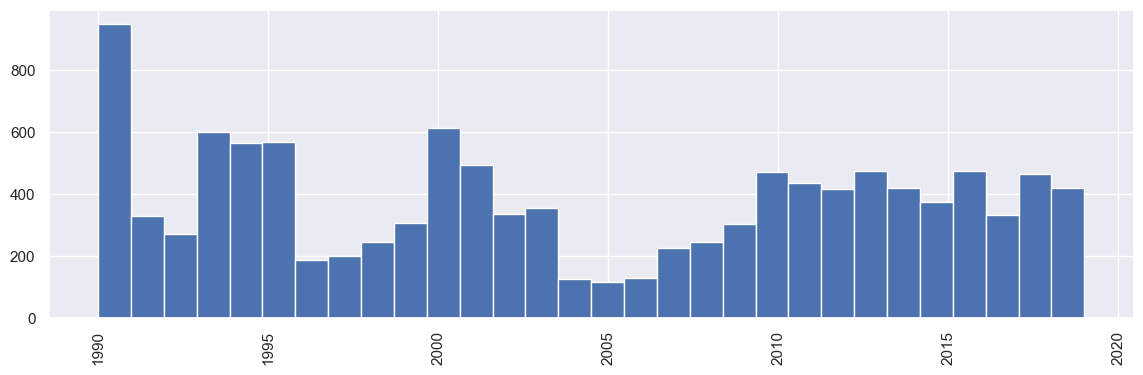

--------------------------------------------------
Histogram: MM


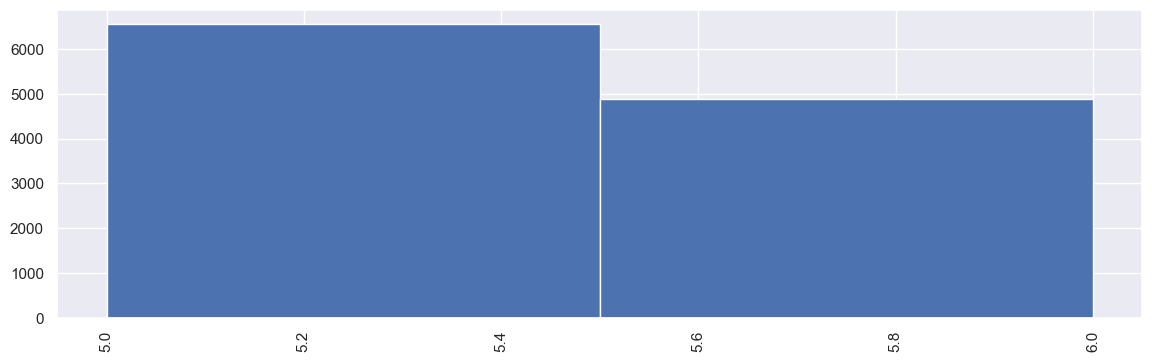

--------------------------------------------------
Histogram: DD


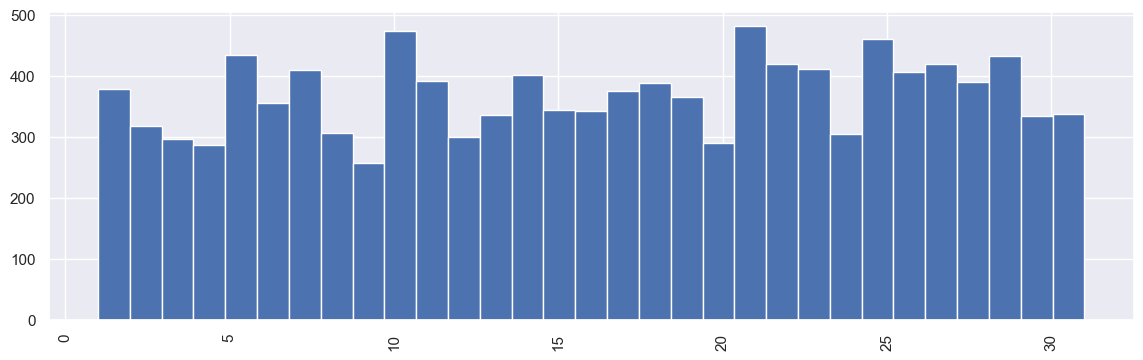

--------------------------------------------------
Histogram: TIME


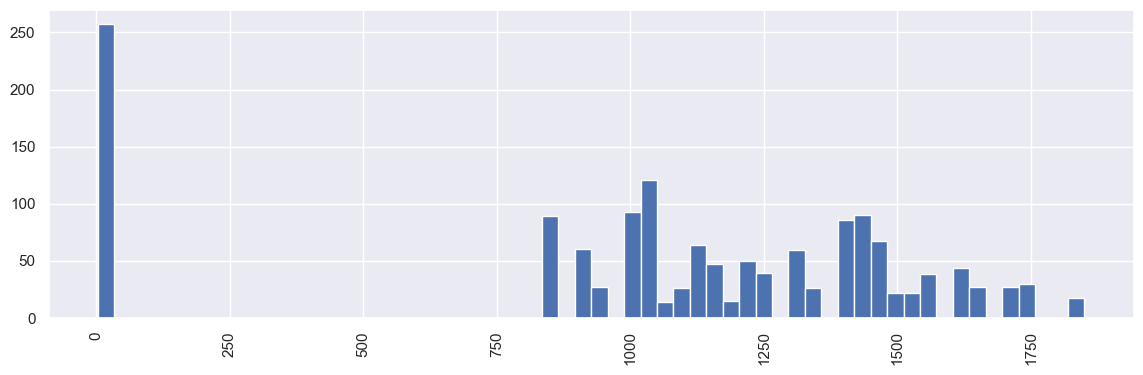

--------------------------------------------------
Histogram: RIVER


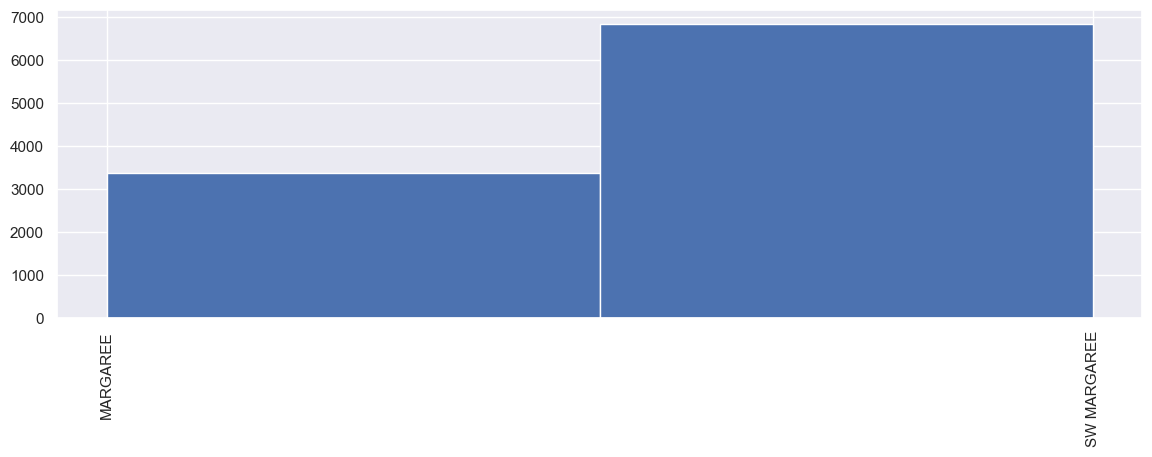

--------------------------------------------------
Histogram: WEEK


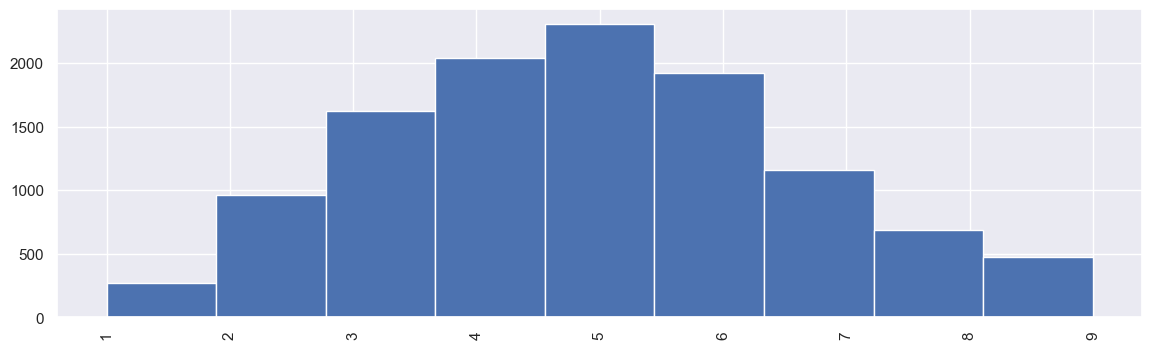

--------------------------------------------------
Histogram: LOC


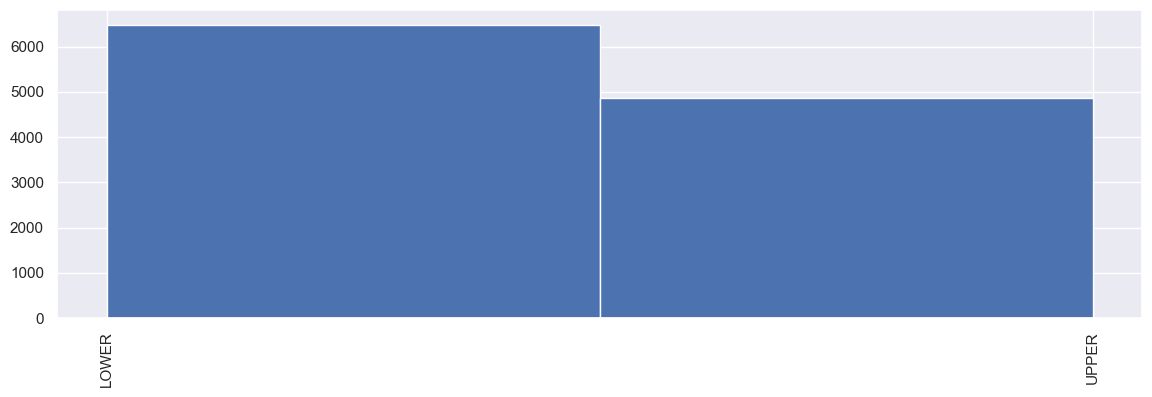

--------------------------------------------------
Histogram: PERIOD


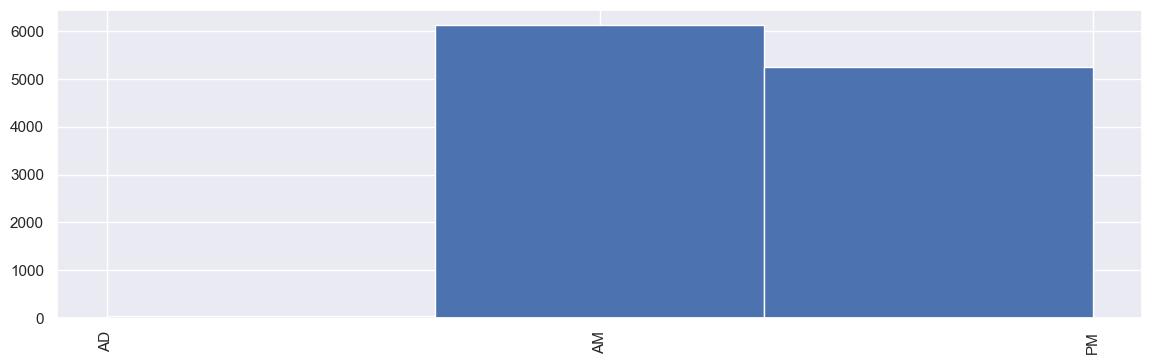

--------------------------------------------------
Histogram: WT_LBS


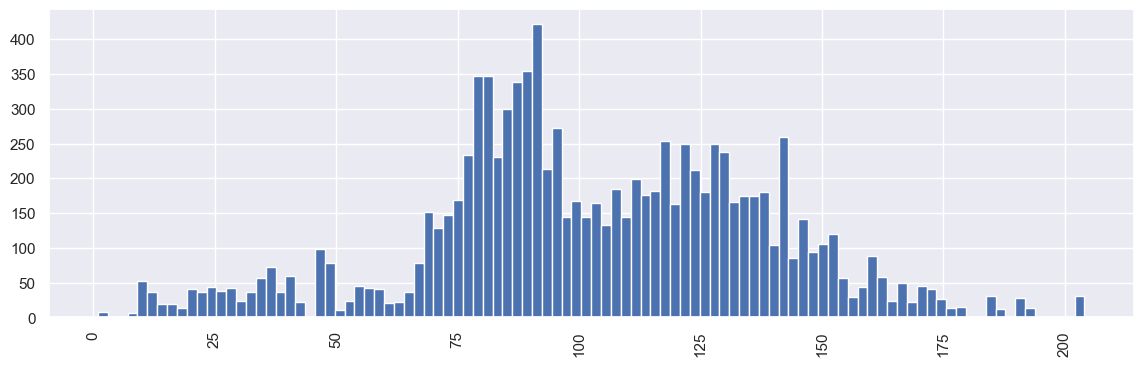

--------------------------------------------------
Histogram: WT_KG


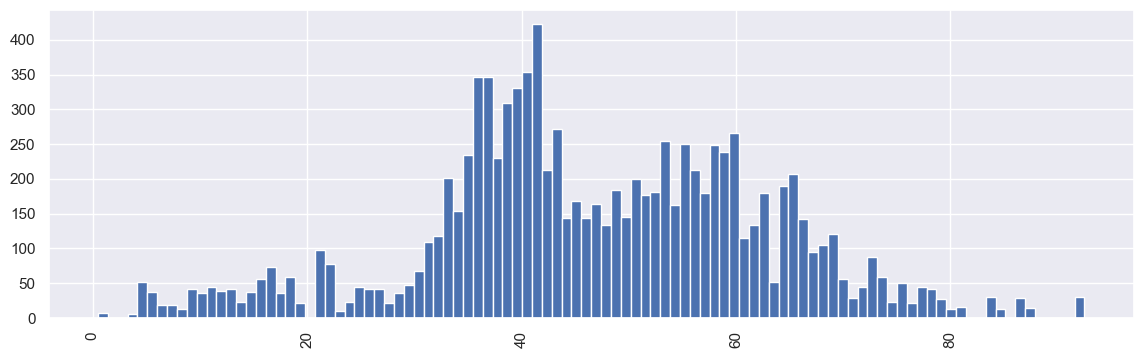

--------------------------------------------------
Histogram: LGTH


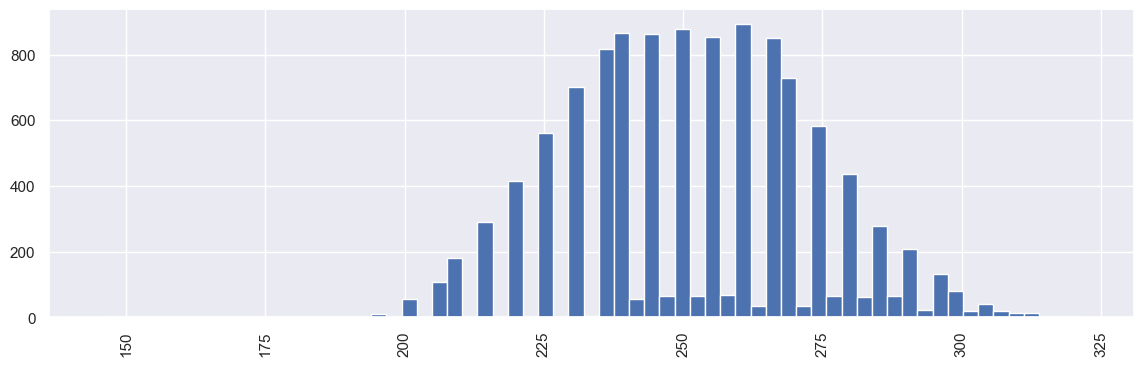

--------------------------------------------------
Histogram: FREQ


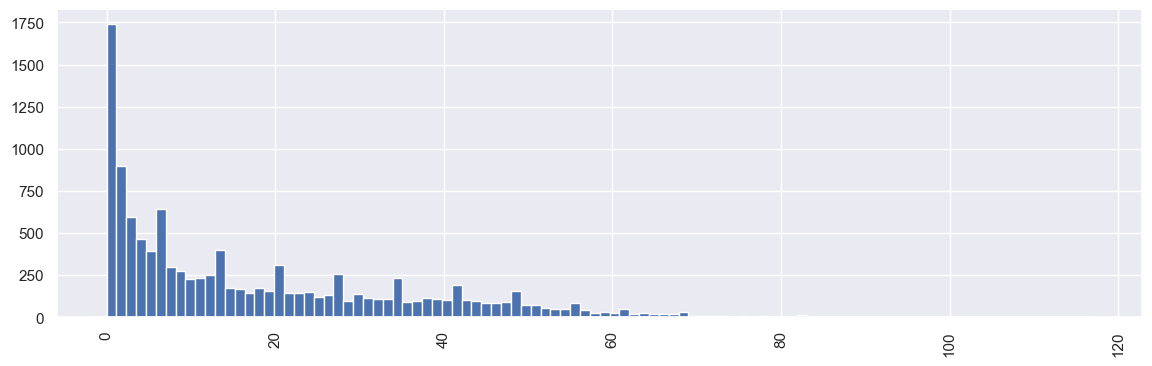

--------------------------------------------------
Histogram: FLBIN


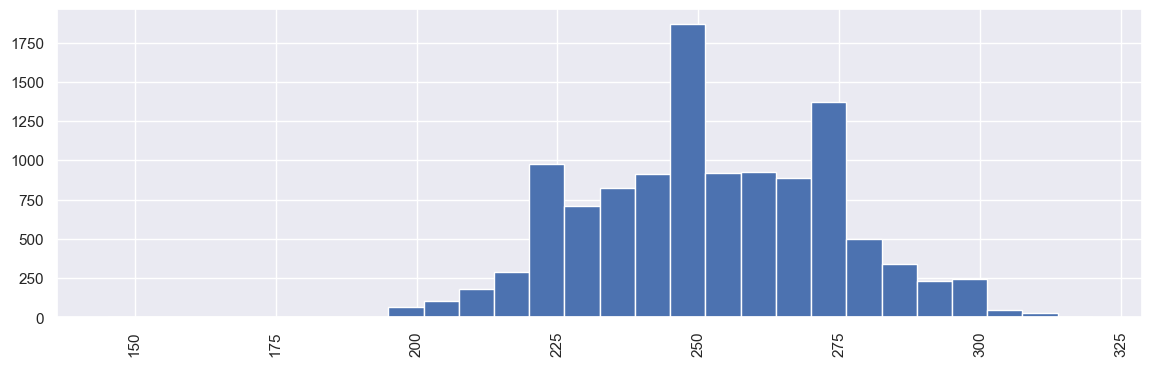

--------------------------------------------------
Histogram: SITE1


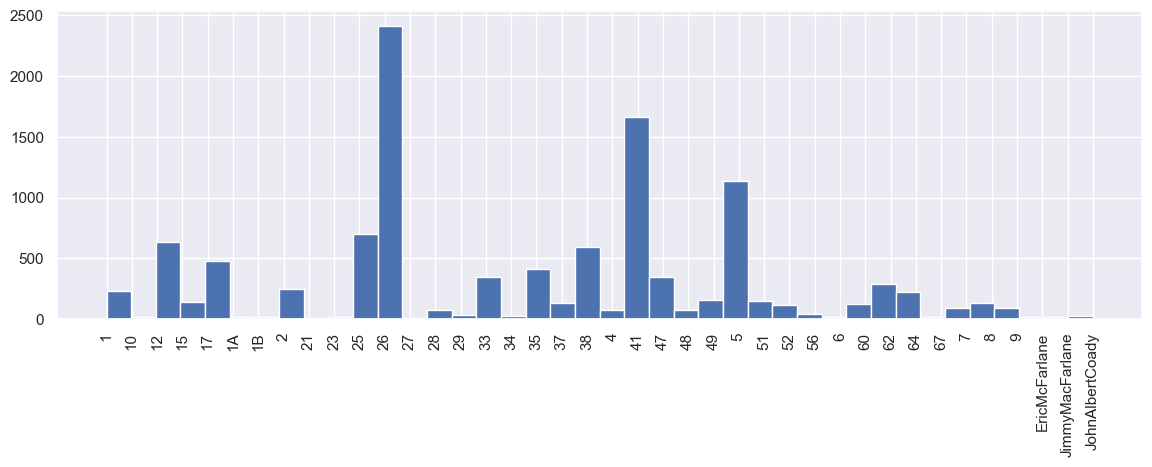

--------------------------------------------------
Histogram: SITE2


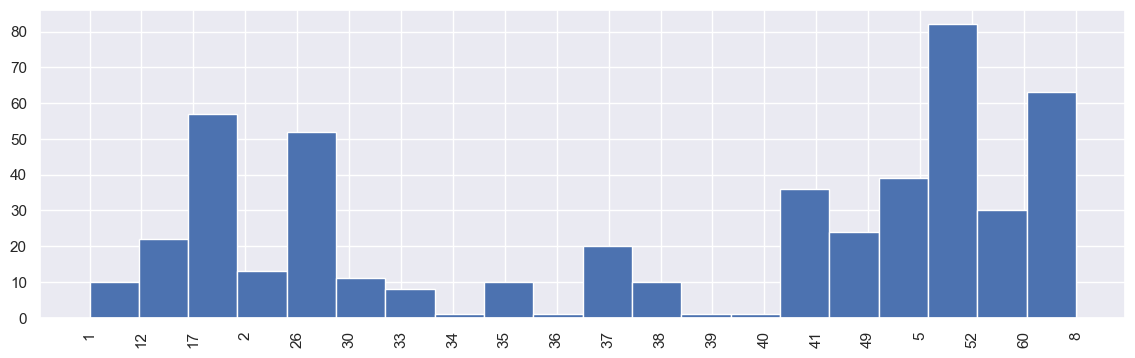

--------------------------------------------------
Histogram: SITE3


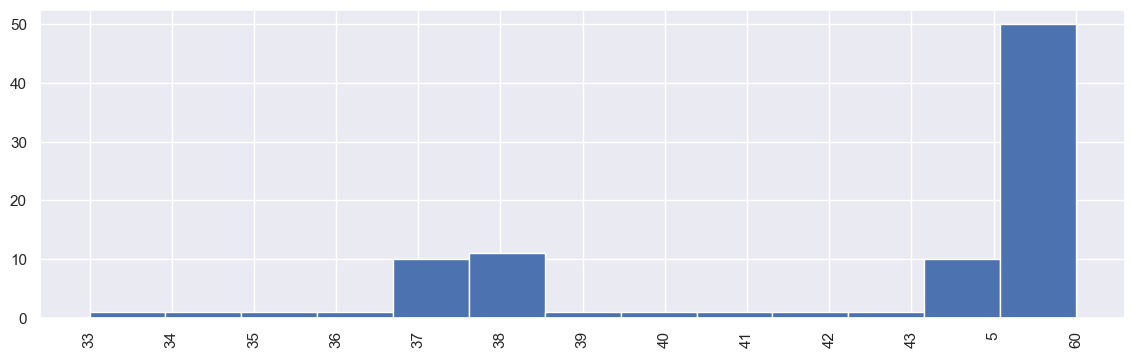

In [3]:
columns_to_print = ['yy', 'mm', 'dd', 'Time', 'river', 'week', 'loc', 'period',
       'wt_lbs', 'wt_kg', 'lgth', 'freq', 'Flbin', 'SITE1', 'SITE2', 'SITE3']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_LF[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins

    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_LF.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[0], xrot=90)
    
    plt.show()

--------------------------------------------------
Histogram: SITE_NO


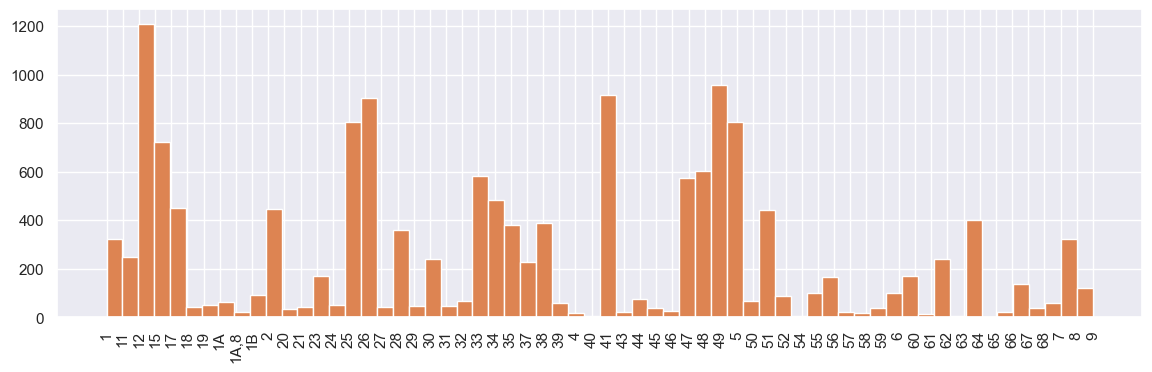

--------------------------------------------------
Histogram: NO_NETS


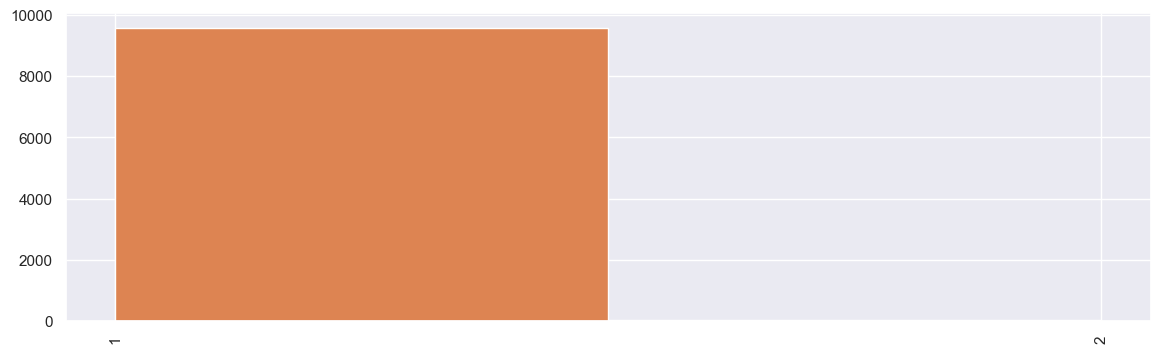

--------------------------------------------------
Histogram: YEAR


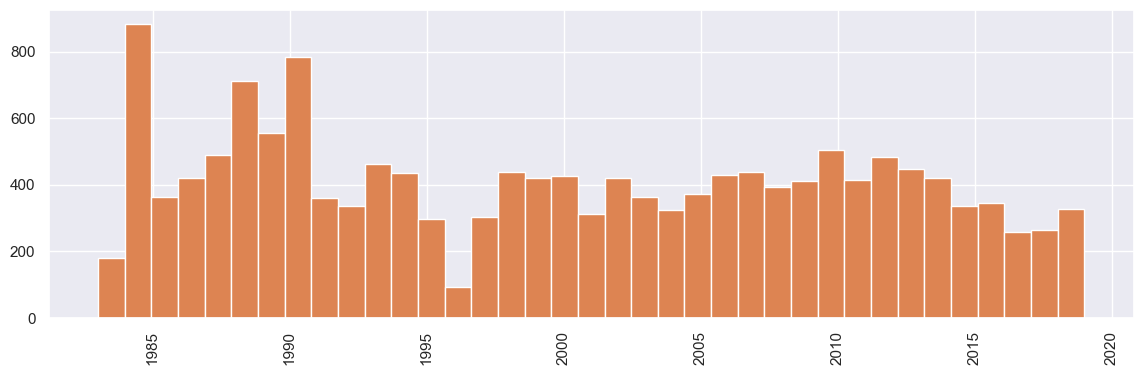

--------------------------------------------------
Histogram: MM


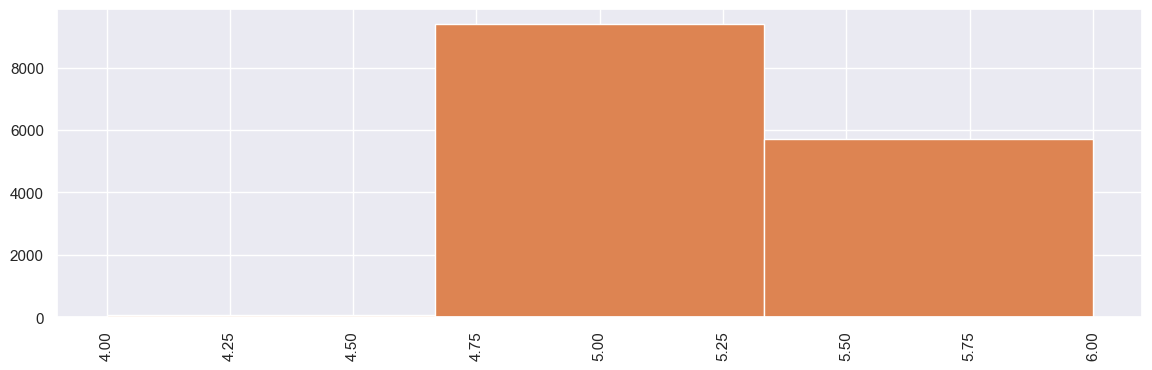

--------------------------------------------------
Histogram: DD


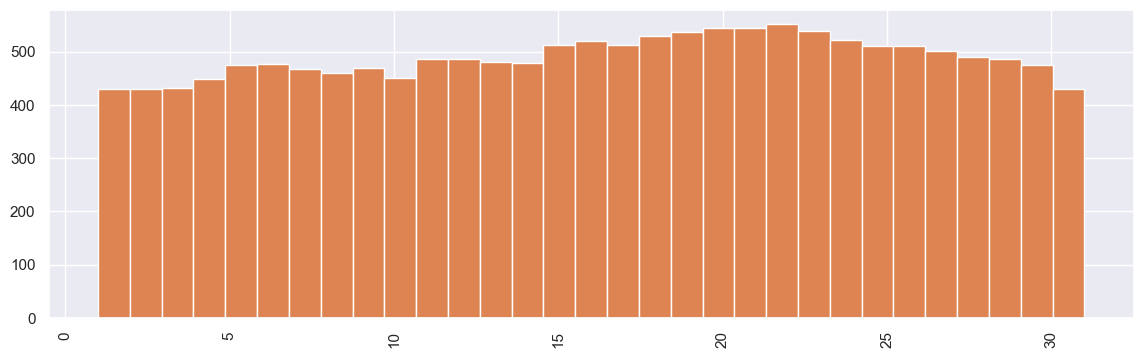

--------------------------------------------------
Histogram: WEEK


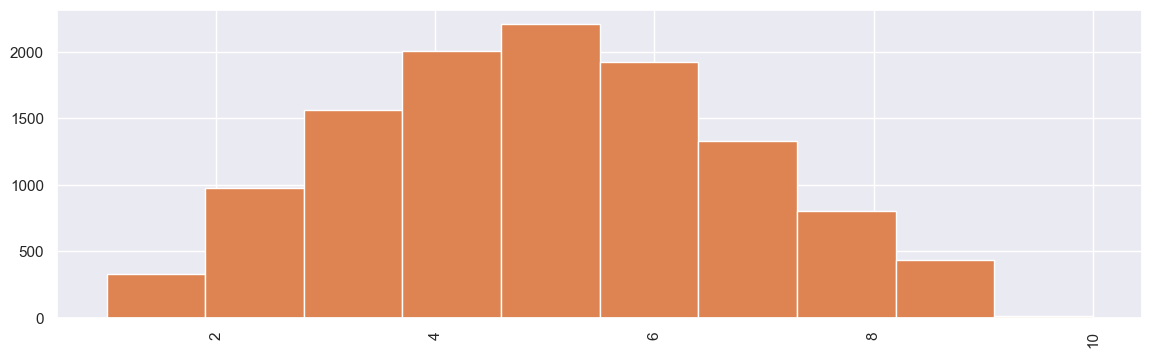

--------------------------------------------------
Histogram: CATCH_LBS


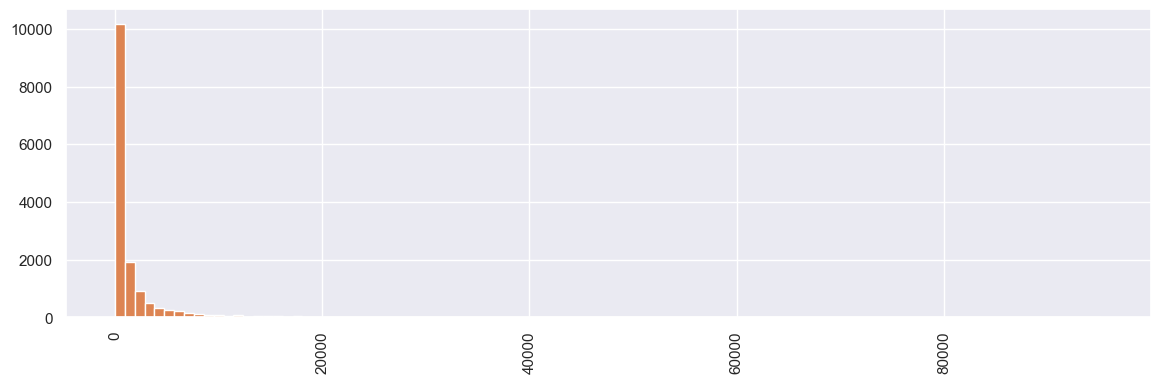

--------------------------------------------------
Histogram: CATCH_KG


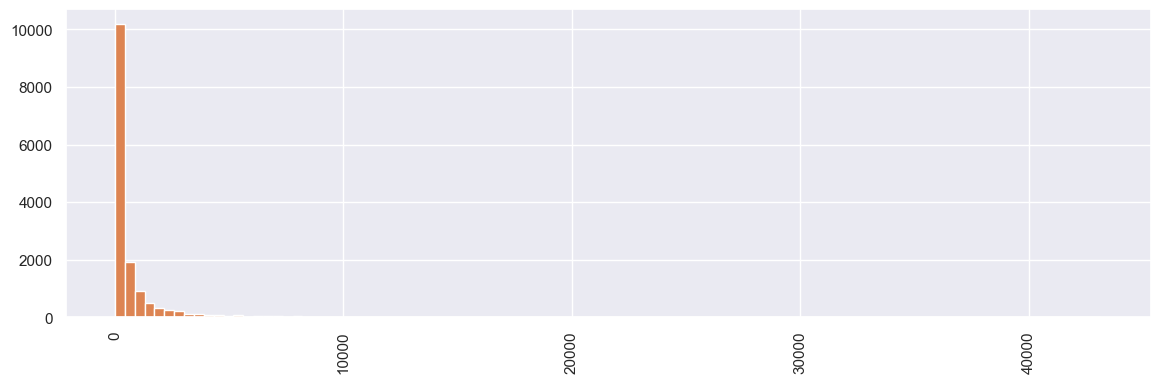

--------------------------------------------------
Histogram: HOURS_FISHED


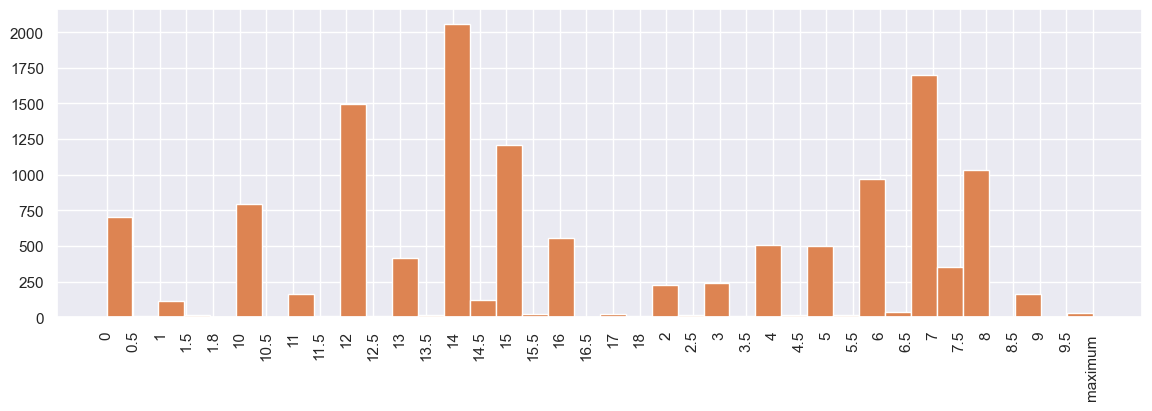

--------------------------------------------------
Histogram: ZONE


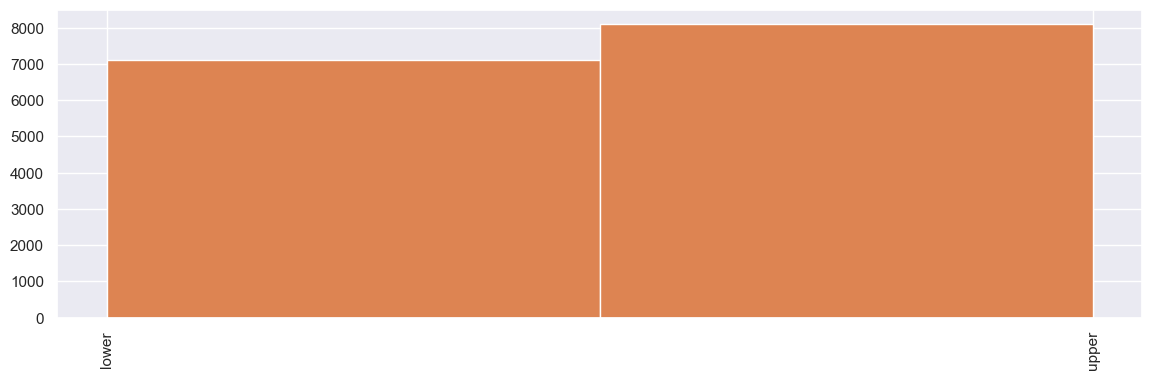

--------------------------------------------------
Histogram: LAST_NAME


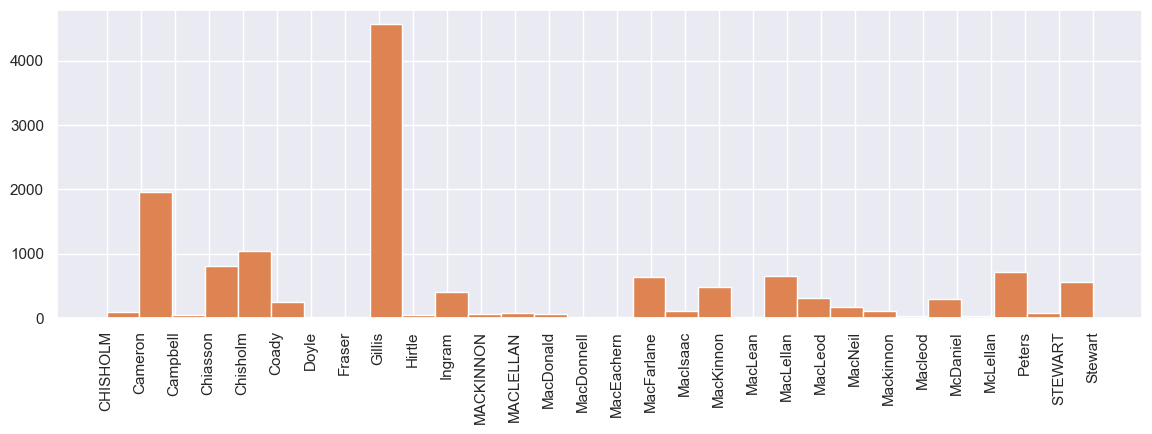

--------------------------------------------------
Histogram: SITE1


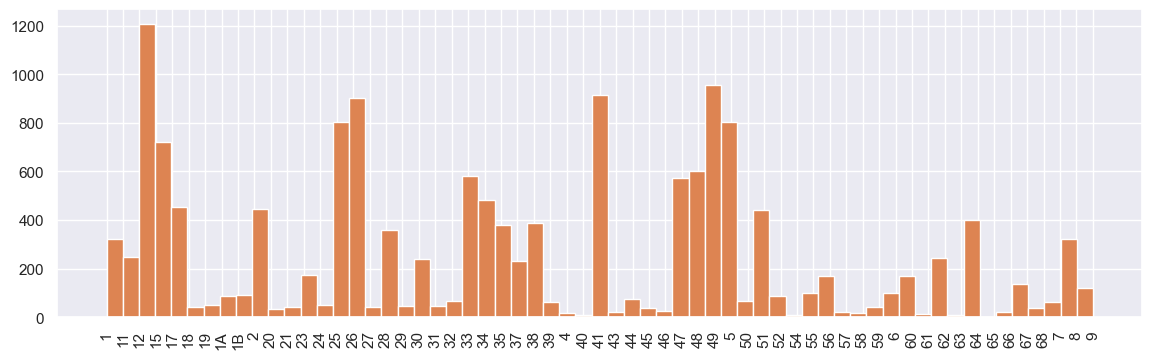

--------------------------------------------------
Histogram: SITE2


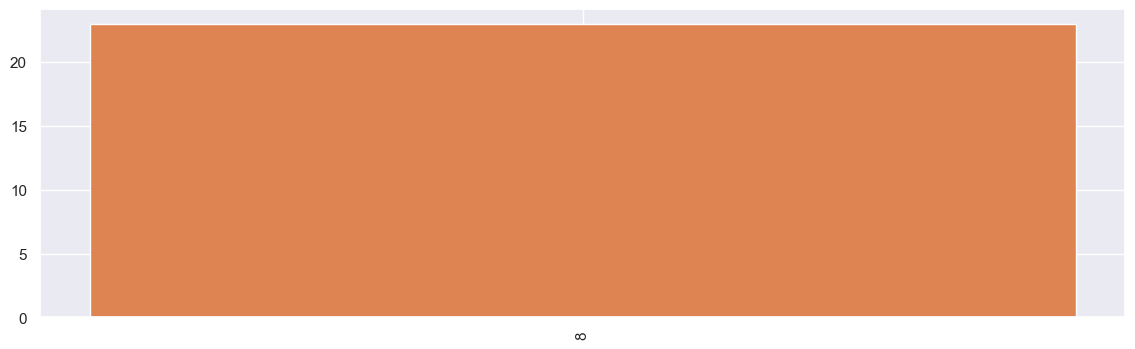

In [4]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_SD[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_SD.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[1], xrot=90)
    
    plt.show()

# Time Series


-------------------------------------------------------
RIVER
CATEGORICAL


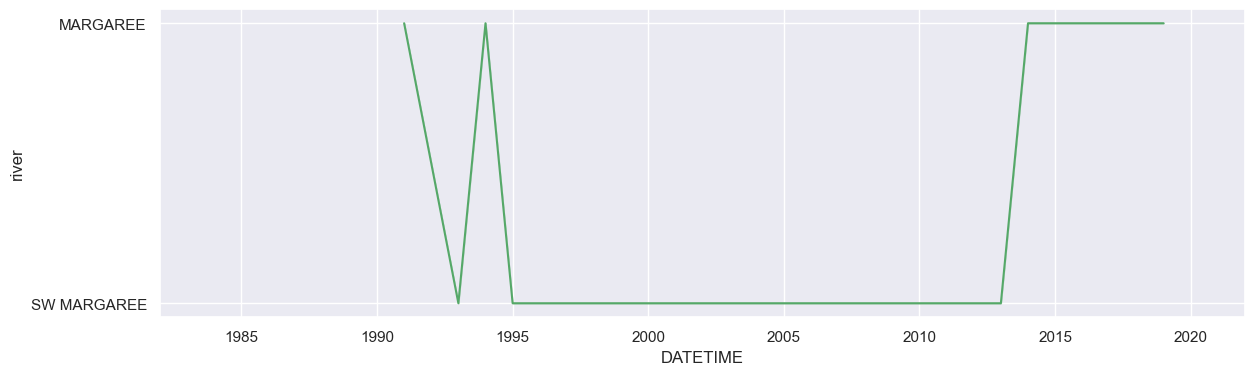


-------------------------------------------------------
SITE
CATEGORICAL


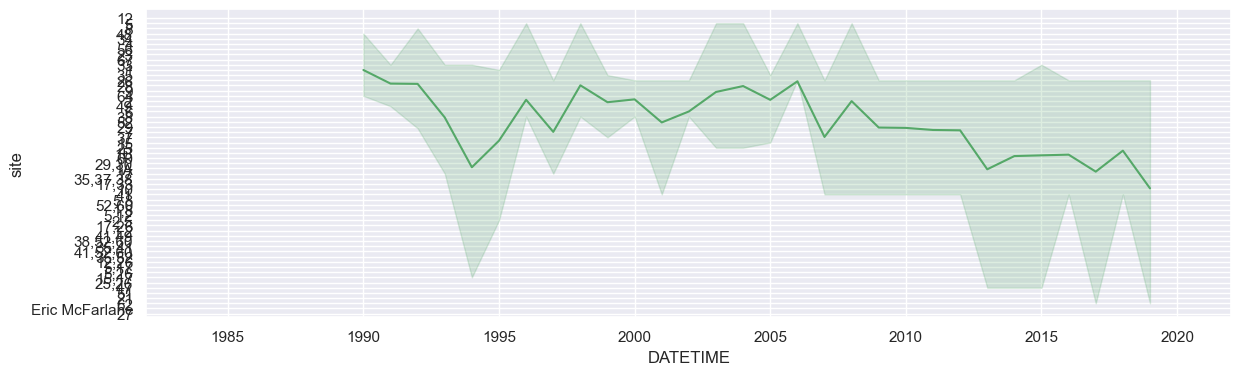


-------------------------------------------------------
LOC
CATEGORICAL


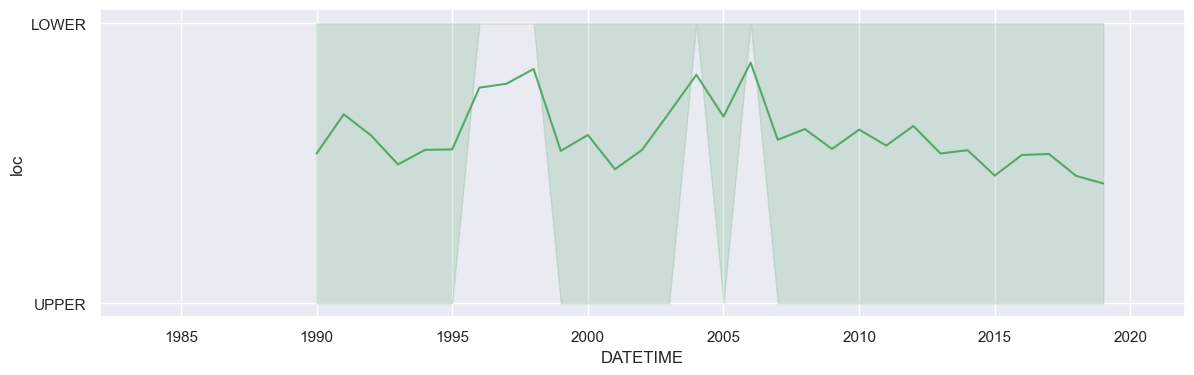


-------------------------------------------------------
PERIOD
CATEGORICAL


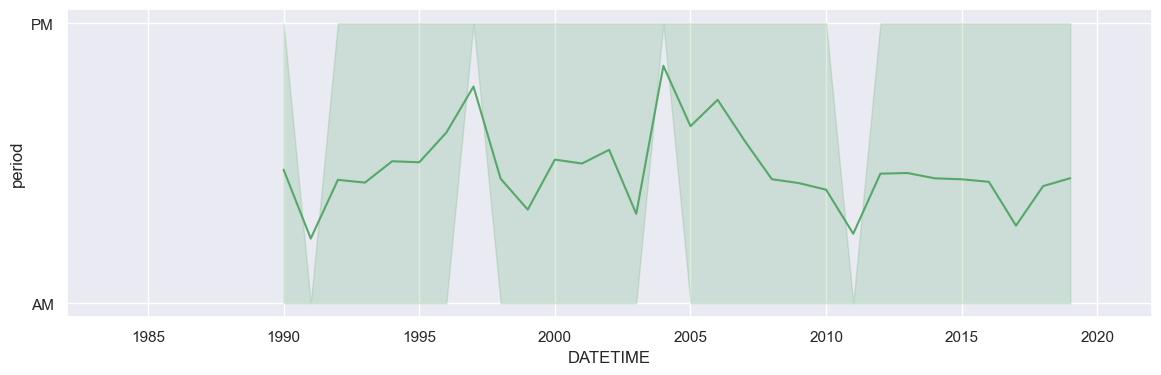


-------------------------------------------------------
WT_LBS
FLOAT


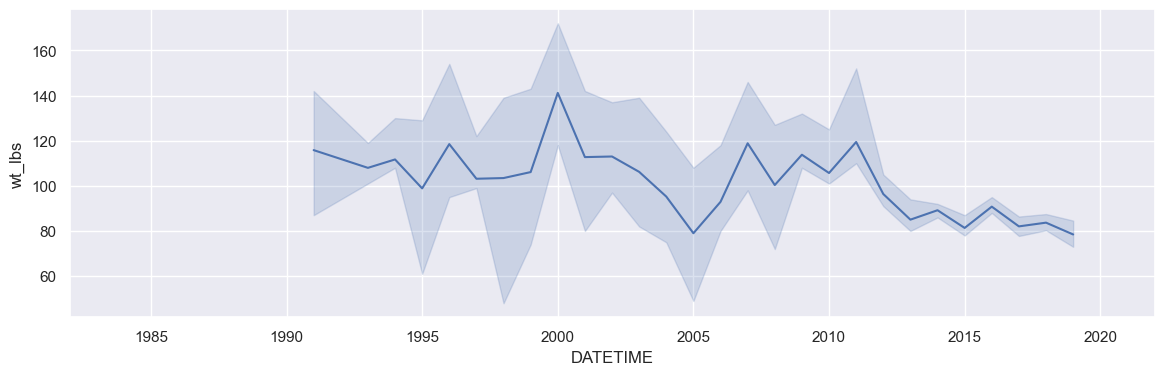


-------------------------------------------------------
WT_KG
FLOAT


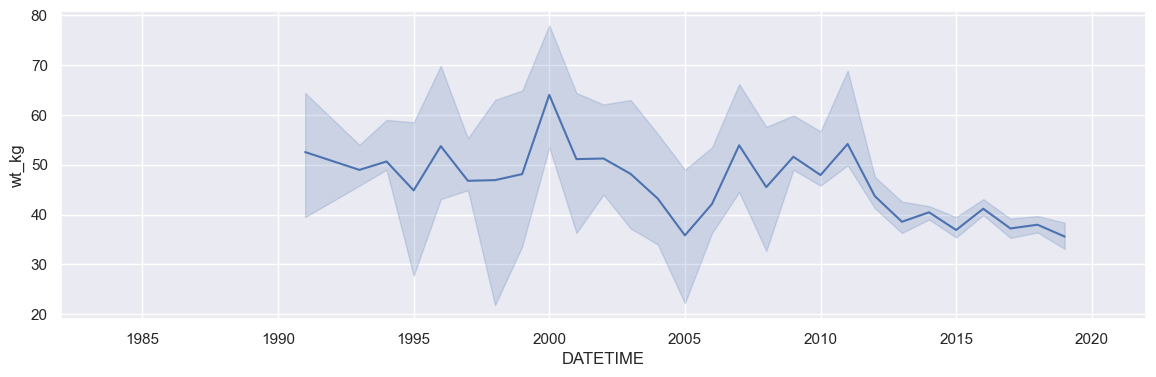


-------------------------------------------------------
LGTH
INT


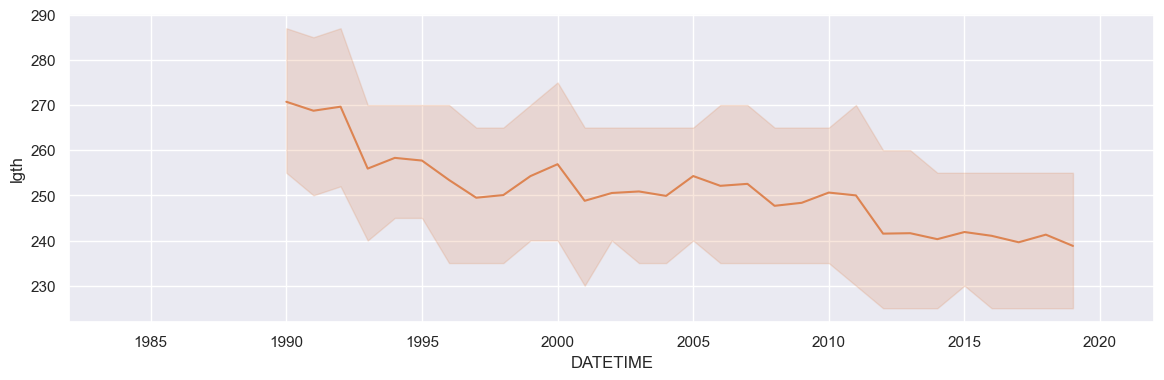


-------------------------------------------------------
FREQ
INT


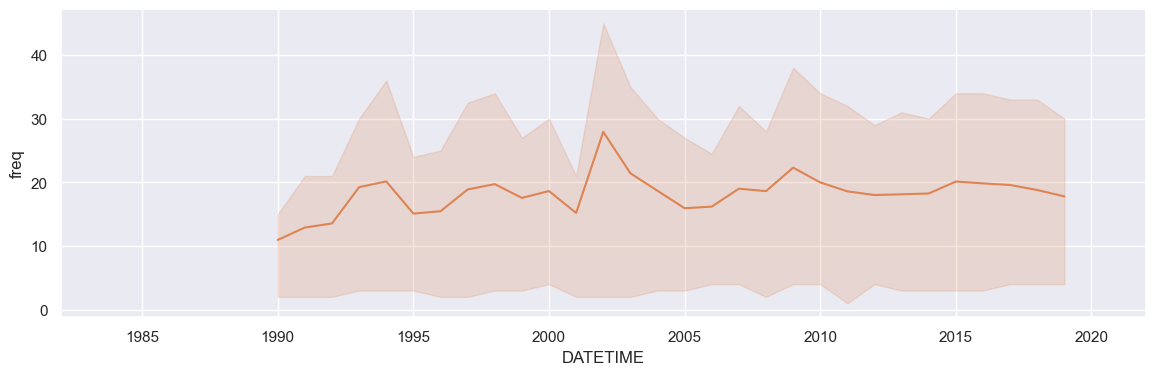


-------------------------------------------------------
FLBIN
INT


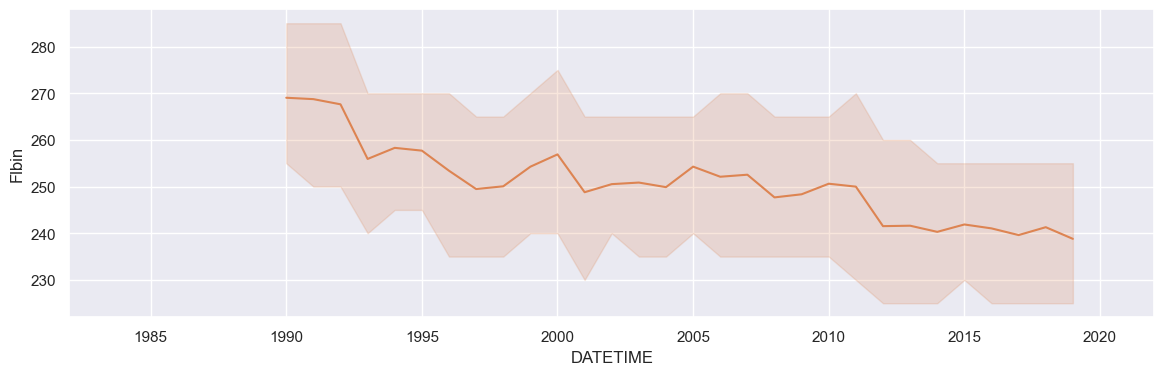


-------------------------------------------------------
SITE1
CATEGORICAL


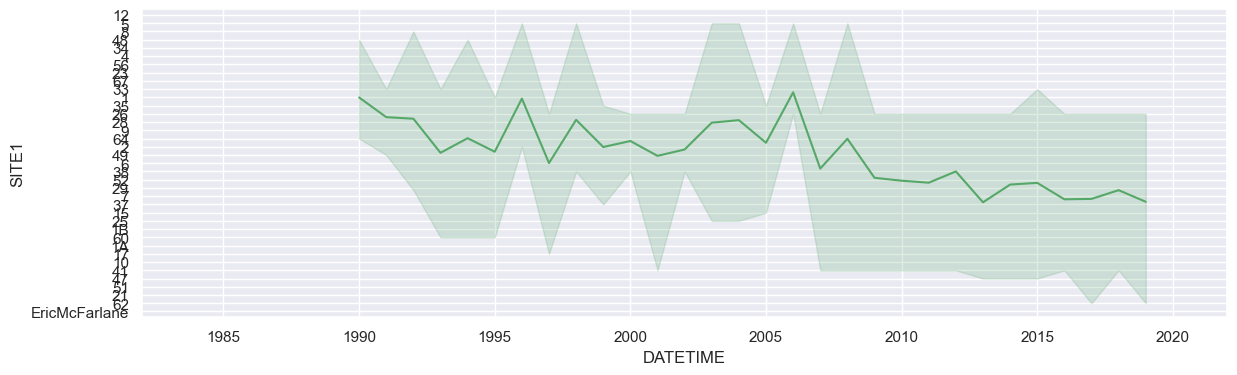


-------------------------------------------------------
SITE2
CATEGORICAL


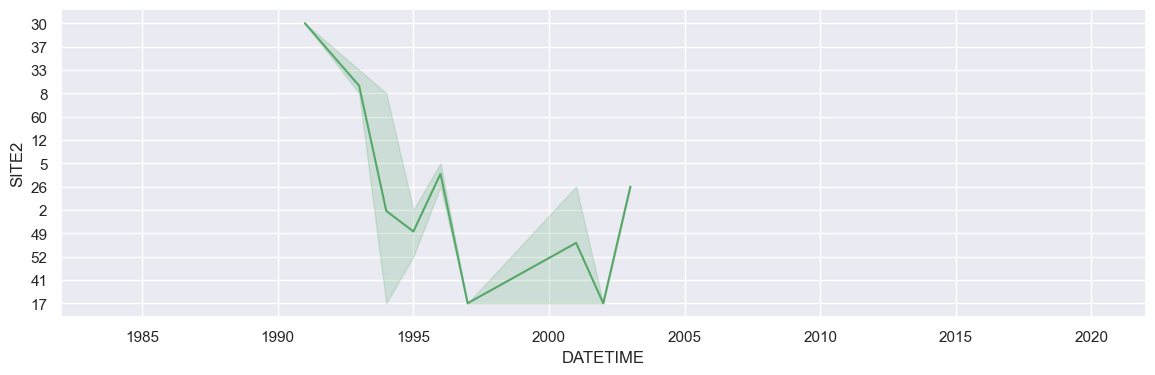


-------------------------------------------------------
SITE3
CATEGORICAL


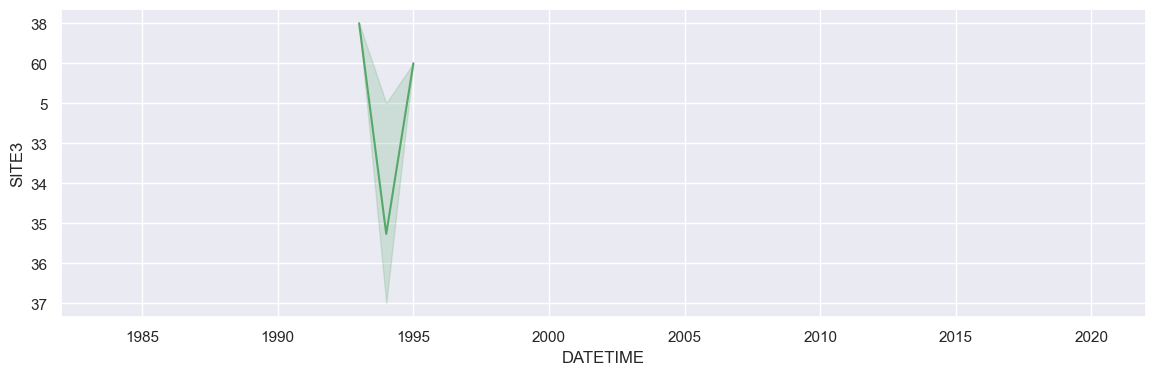

In [5]:
features = {
    'river': 'categorical',
    'site': 'categorical', 
    'loc': 'categorical', 
    'period': 'categorical', 
    'wt_lbs': 'float', 
    'wt_kg': 'float', 
    'lgth': 'integer',
    'freq': 'integer',
    'Flbin': 'integer',
    'SITE1': 'categorical',
    'SITE2': 'categorical',
    'SITE3': 'categorical'
}

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[0])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[1])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[2])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

In [6]:
df_SD.columns

Index(['DIST', 'RIVER', 'NAME', 'code', 'GEAR', 'SITE_NO', 'no_nets', 'YEAR',
       'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 'hours_fished', 'zone',
       'last_name', 'comments', 'bycatch_sbass', 'bycatch_shad',
       'bycatch_other', 'SITE1', 'SITE2', 'DATETIME'],
      dtype='object')


-------------------------------------------------------
SITE_NO
CATEGORICAL


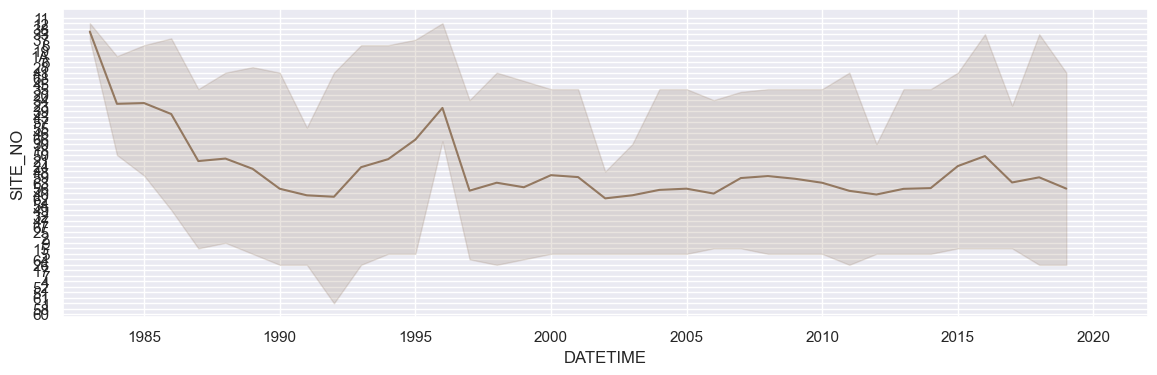


-------------------------------------------------------
NO_NETS
CATEGORICAL


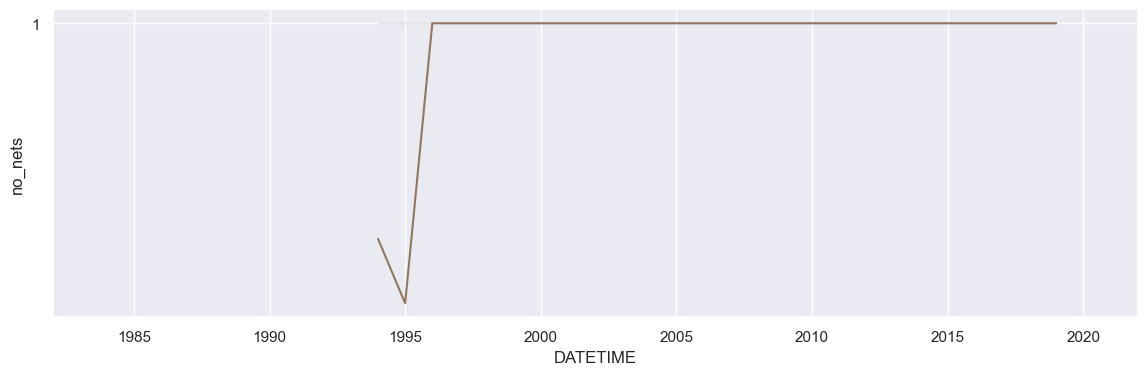


-------------------------------------------------------
CATCH_LBS
FLOAT


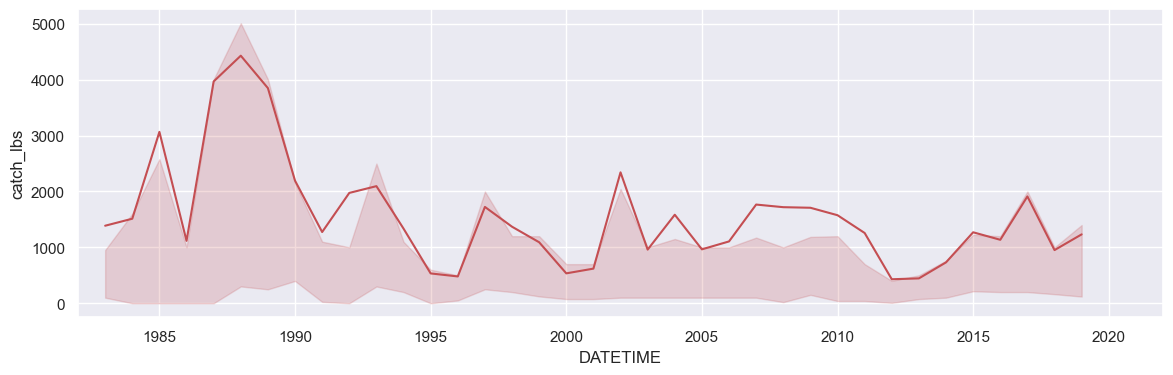


-------------------------------------------------------
CATCH_KG
FLOAT


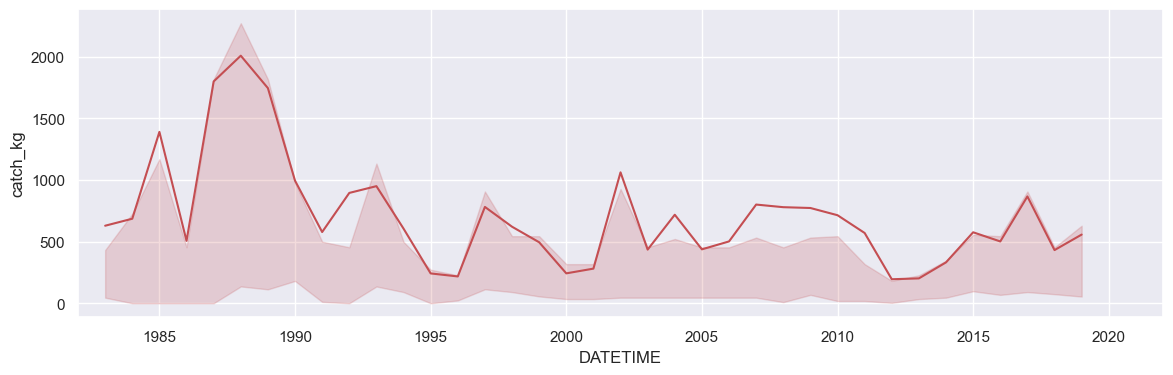


-------------------------------------------------------
ZONE
CATEGORICAL


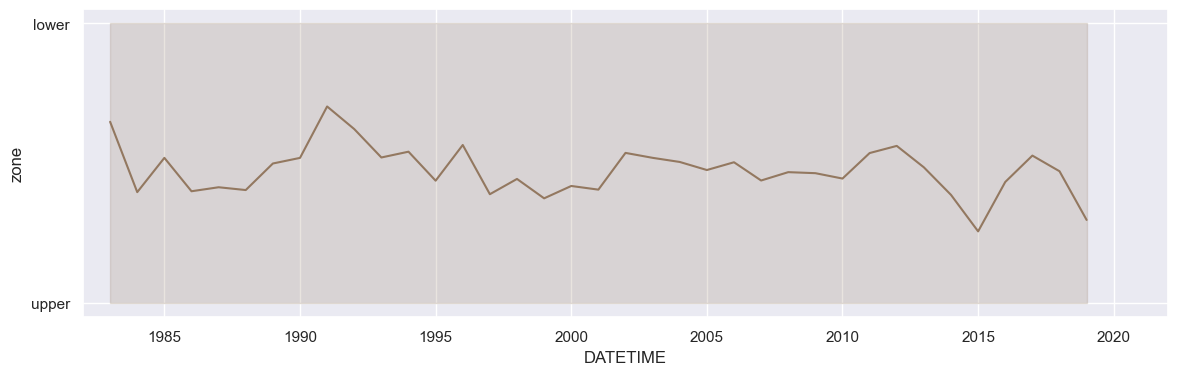


-------------------------------------------------------
LAST_NAME
CATEGORICAL


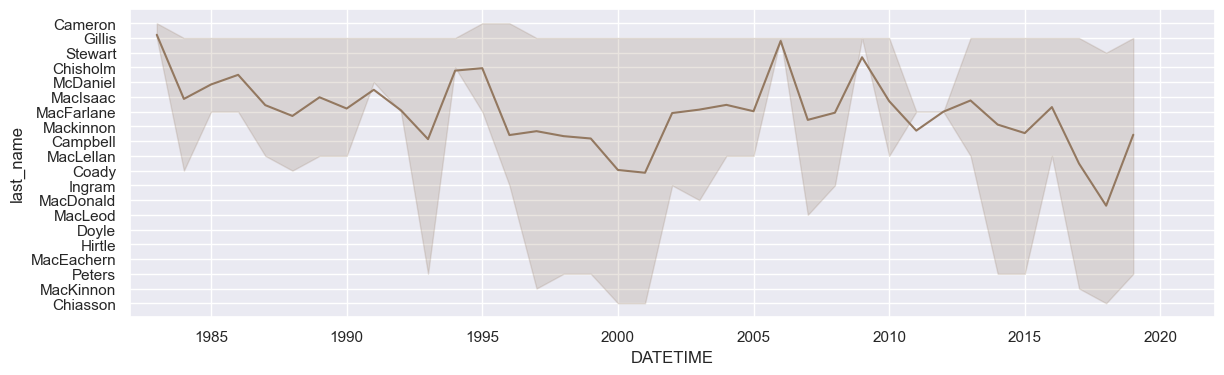


-------------------------------------------------------
HOURS_FISHED
FLOAT


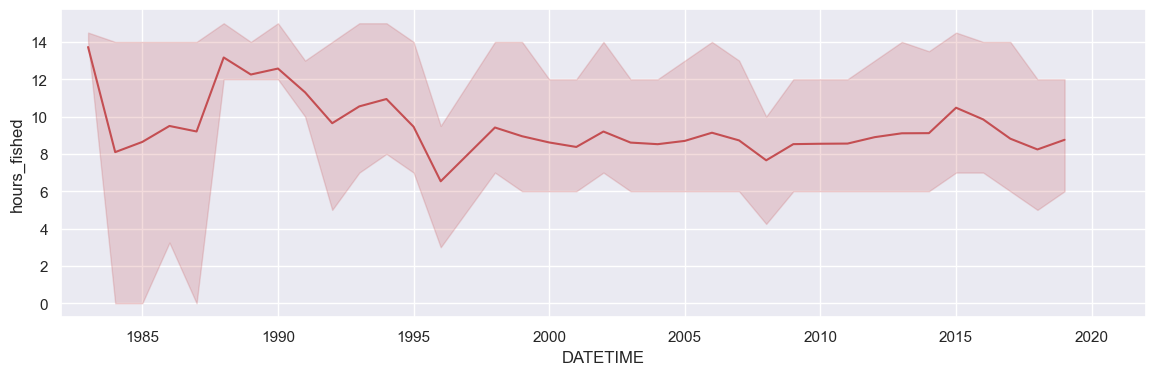


-------------------------------------------------------
SITE1
CATEGORICAL


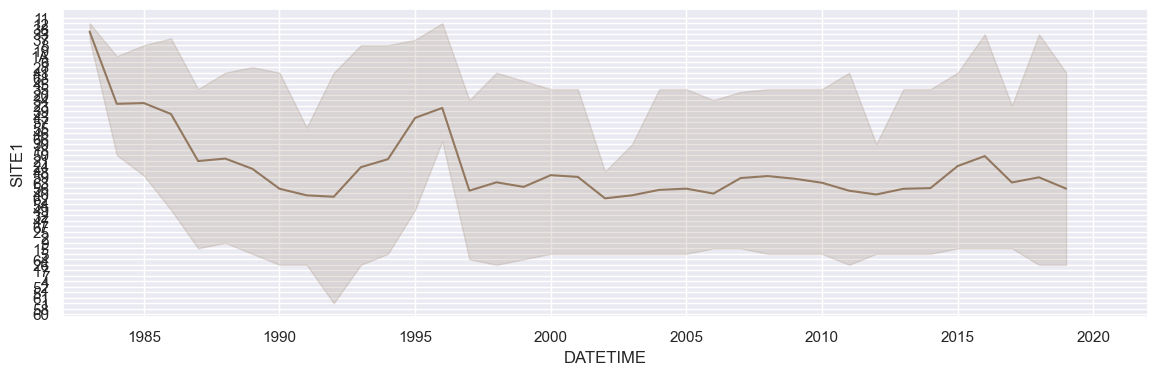


-------------------------------------------------------
SITE2
CATEGORICAL


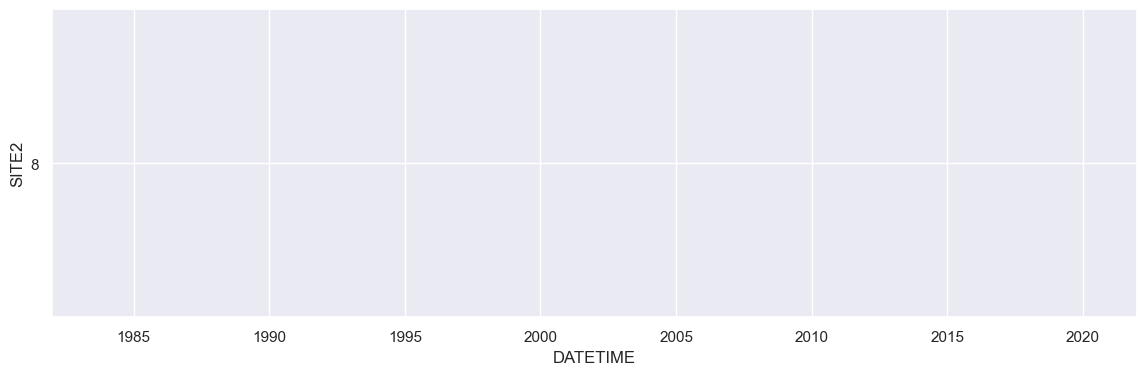

In [7]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

features = {
    'SITE_NO': 'categorical',
    'no_nets': 'categorical',  
    'catch_lbs': 'float', 
    'catch_kg': 'float', 
    'zone': 'categorical',
    'last_name': 'categorical',
    'hours_fished': 'float',  # update this field in temp dataframe
    'SITE1': 'categorical',
    'SITE2': 'categorical'
}

df = df_SD.copy()
df.loc[df['hours_fished'] == 'maximum ', 'hours_fished'] = '24'
df['hours_fished'] = df['hours_fished'].astype(float)

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[3])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[4])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[5])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

# Length Frequencies

In [8]:
df_LF.columns

Index(['yy', 'mm', 'dd', 'Time', 'river', 'week', 'site', 'loc', 'period',
       'wt_lbs', 'wt_kg', 'lgth', 'freq', 'Flbin', 'DATETIME', 'SITE1',
       'SITE2', 'SITE3'],
      dtype='object')

In [9]:
# almost every single row
df_LF.groupby(['DATETIME', 'site', 'lgth']).sum()['freq'].expanding().sum()

DATETIME    site  lgth
1990-05-07  12    250         1.000
                  253         2.000
                  255         4.000
                  258         6.000
                  260        13.000
                            ...    
2019-06-28  41    240    203897.000
                  245    203908.000
                  250    203914.000
                  255    203916.000
                  260    203917.000
Name: freq, Length: 11308, dtype: float64

In [10]:
# format in dm_apps is
    # id, count, length_bin_id, sample_id
    # NOTE: each bin gets an id, samples get consistent ids
    # can autogen the id, forget for now
    # use date and site to create sample id
        # CONFIRM THAT THIS COMBINATION IS DISTINCT

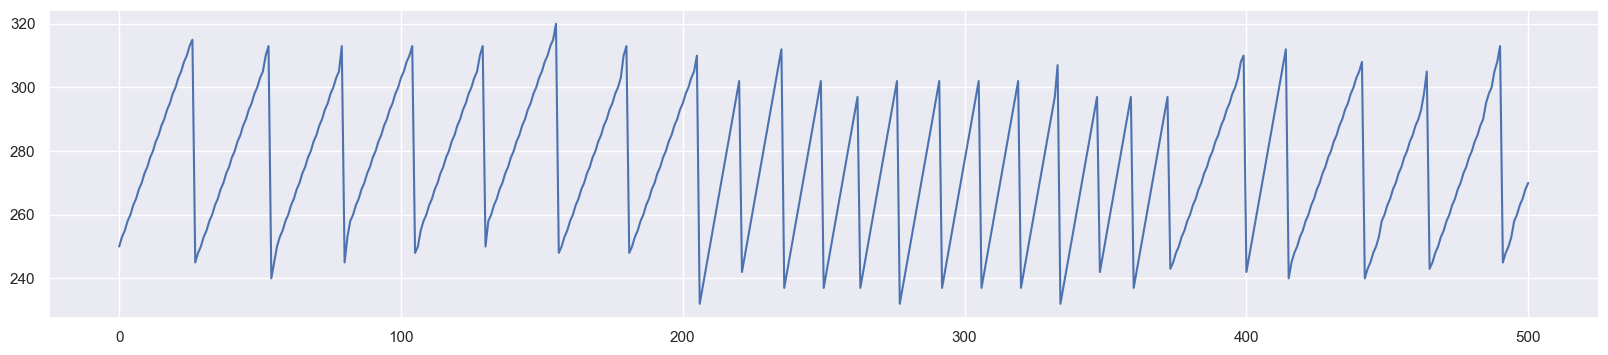

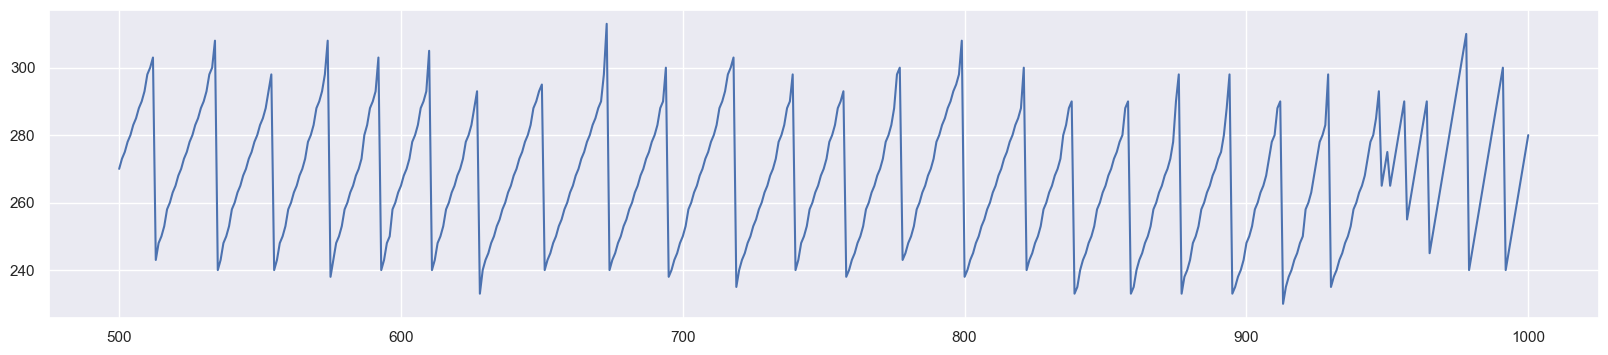

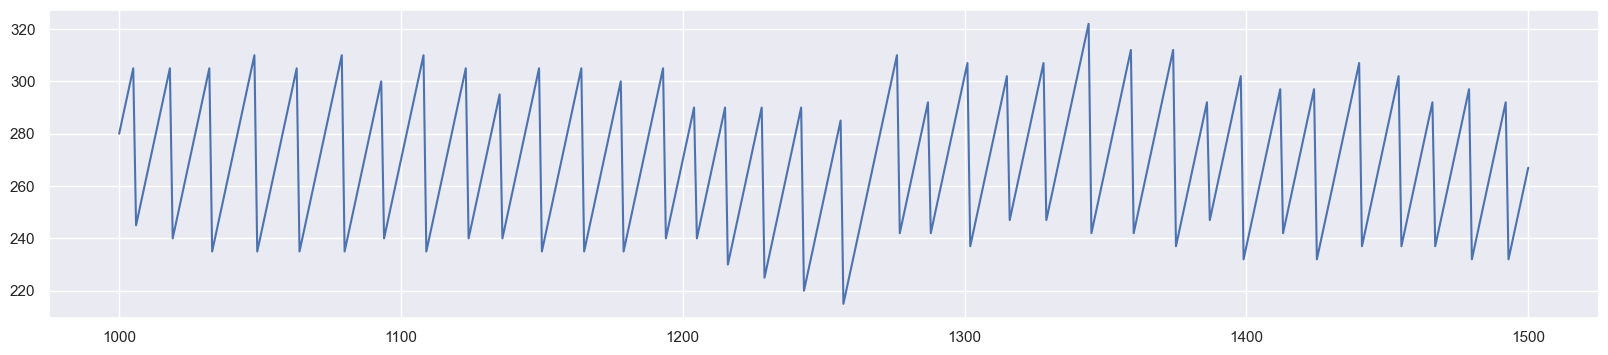

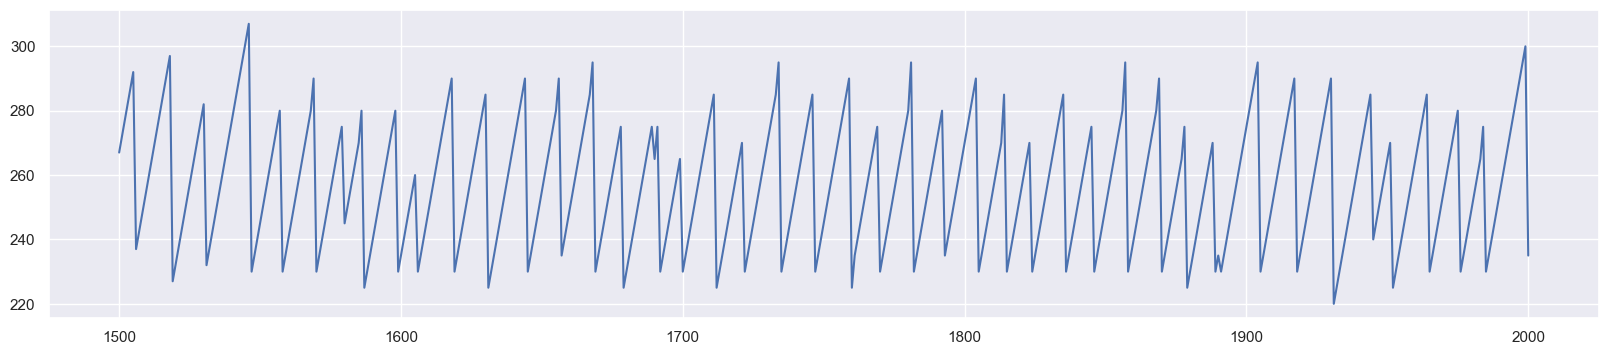

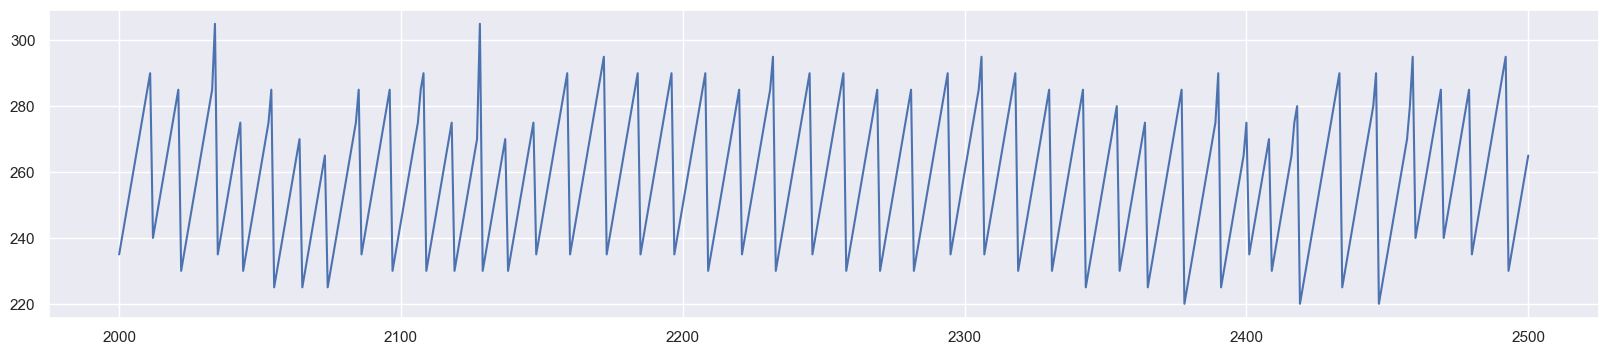

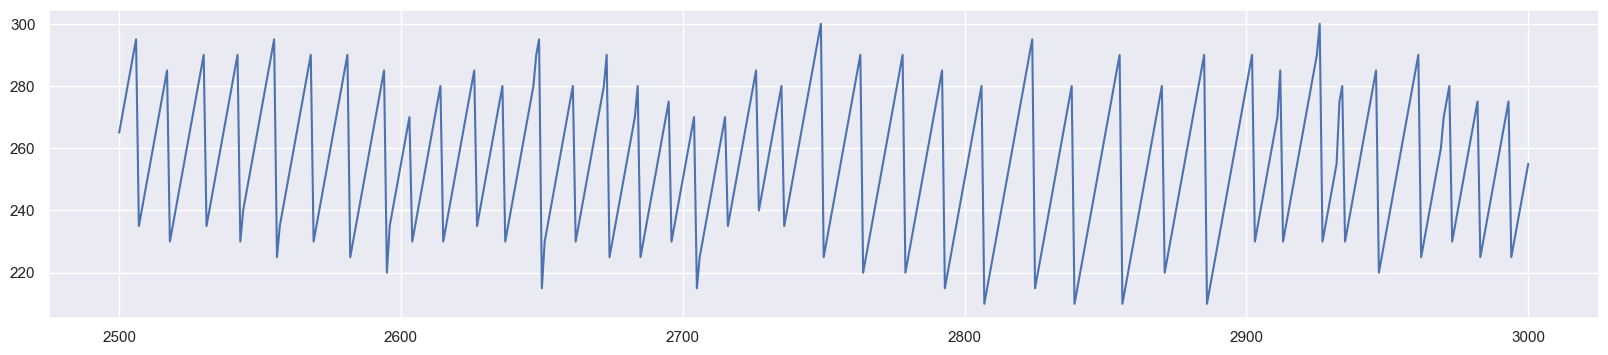

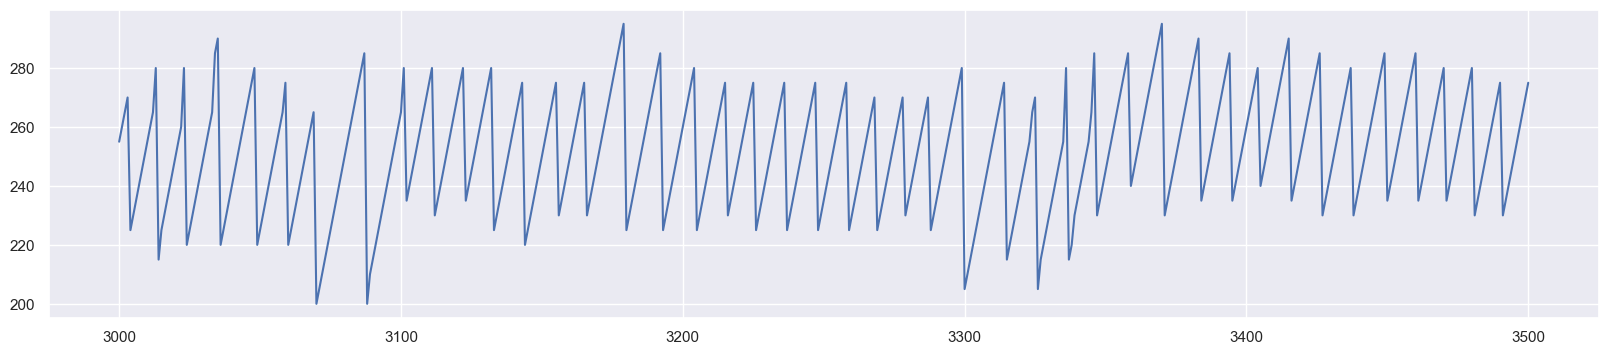

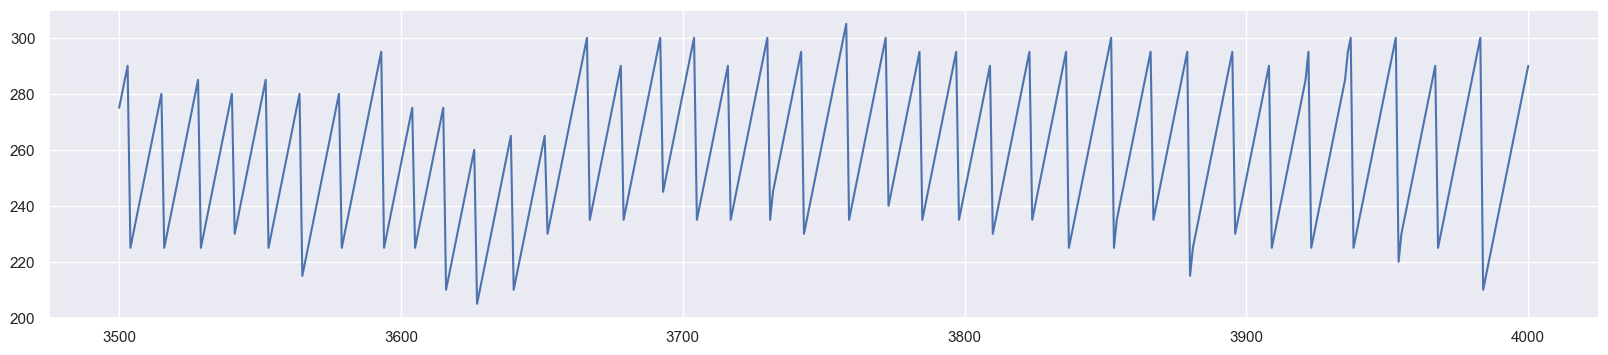

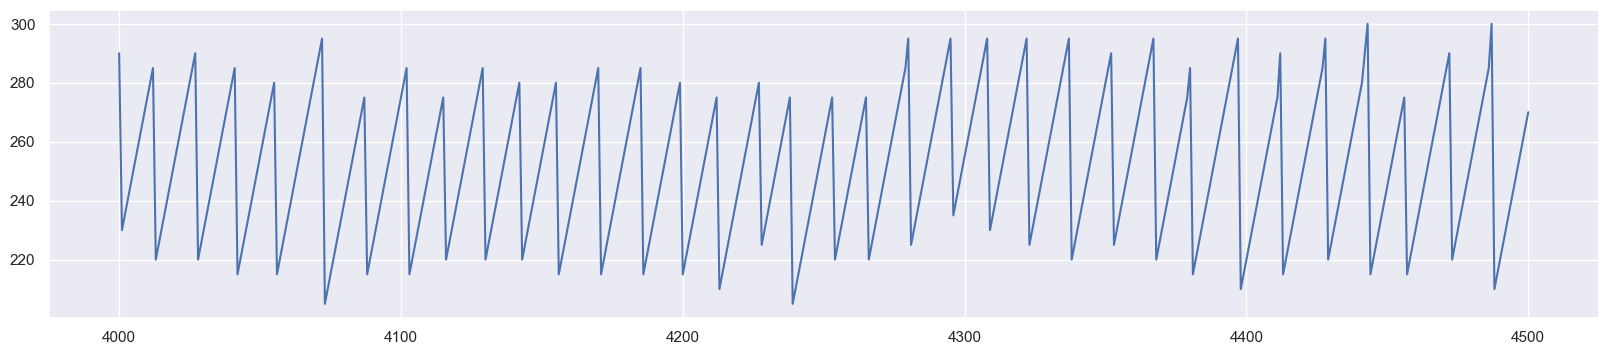

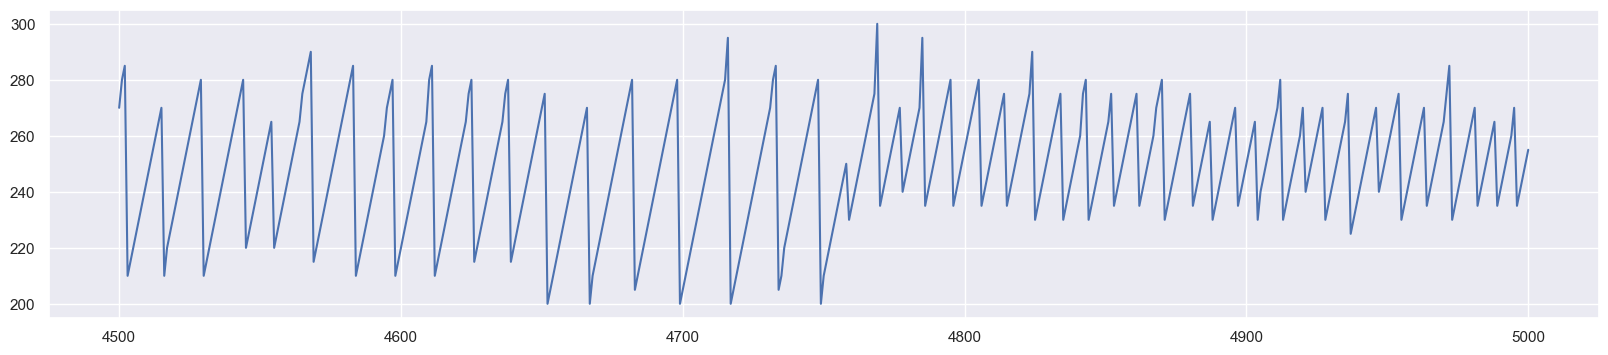

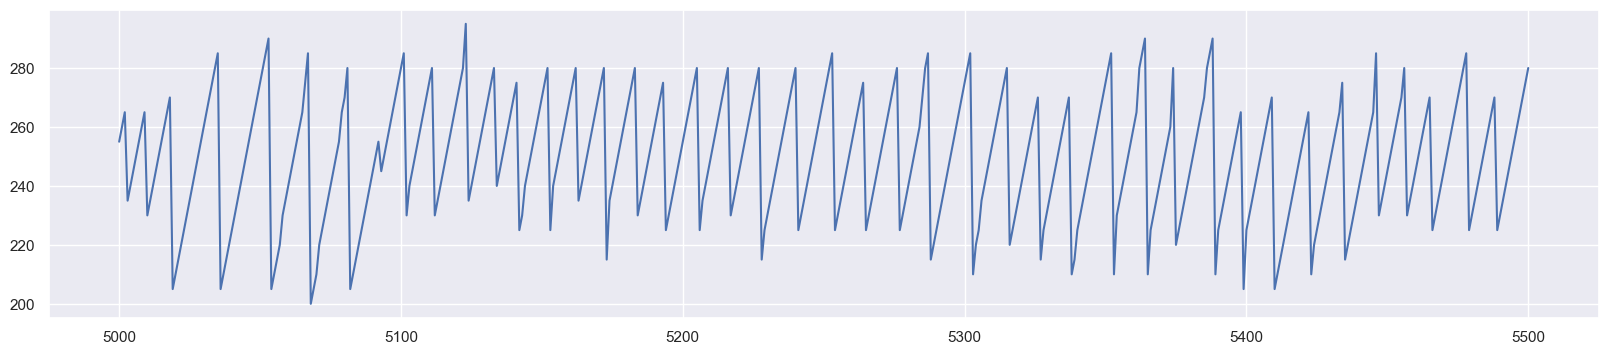

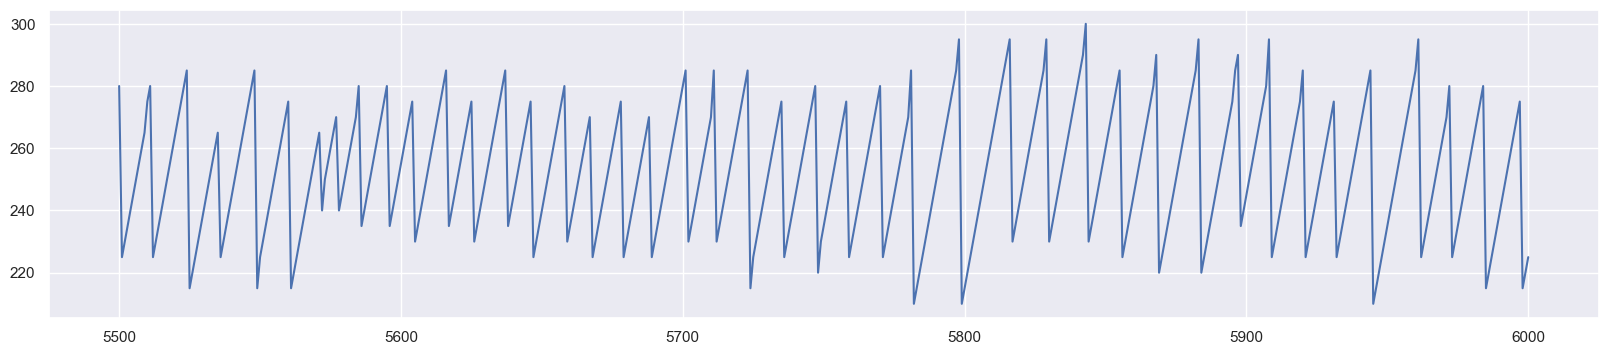

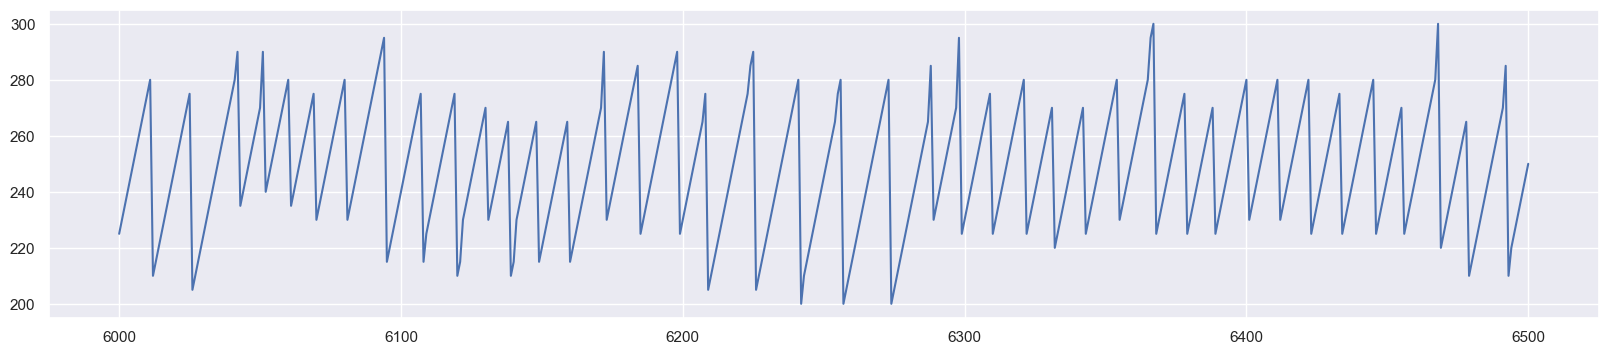

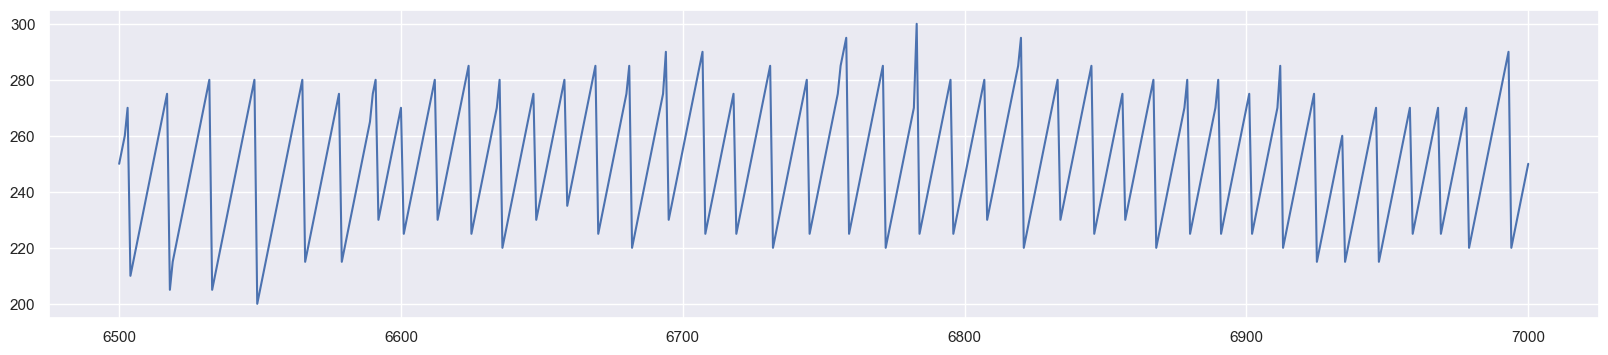

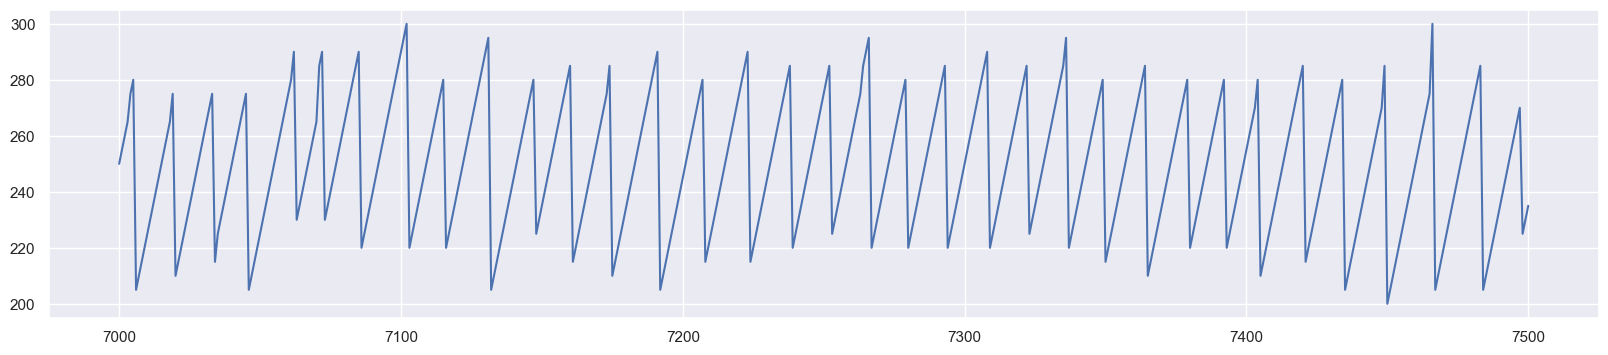

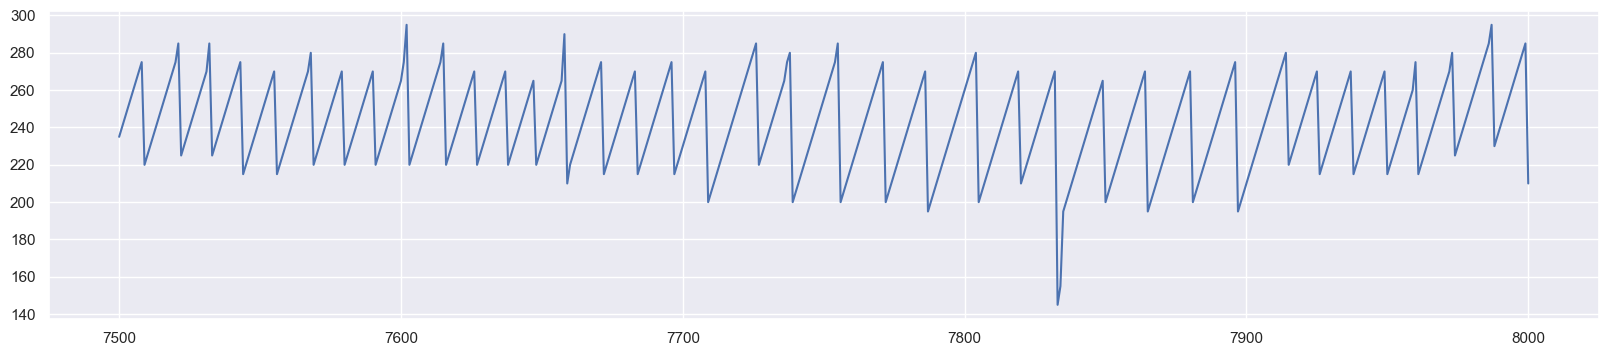

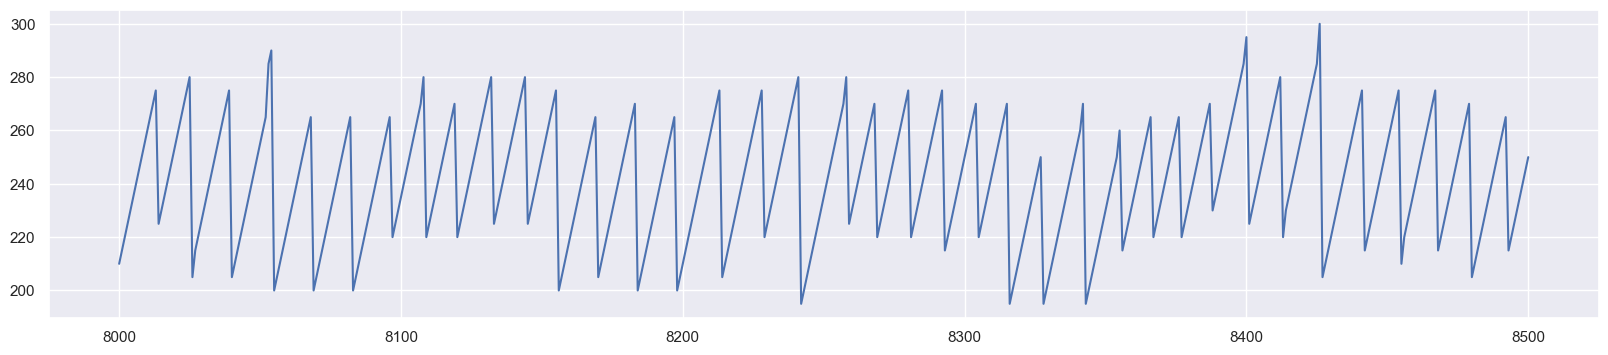

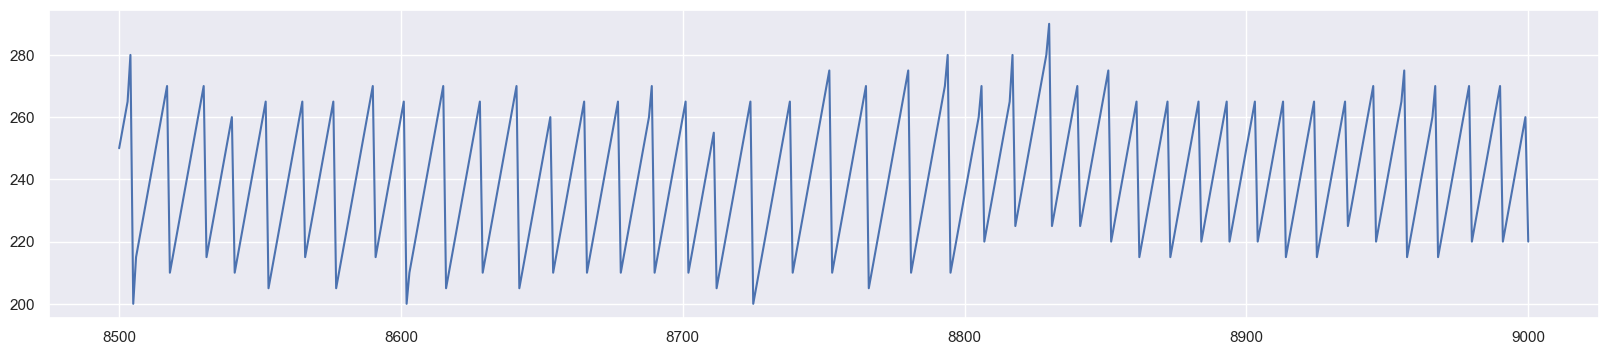

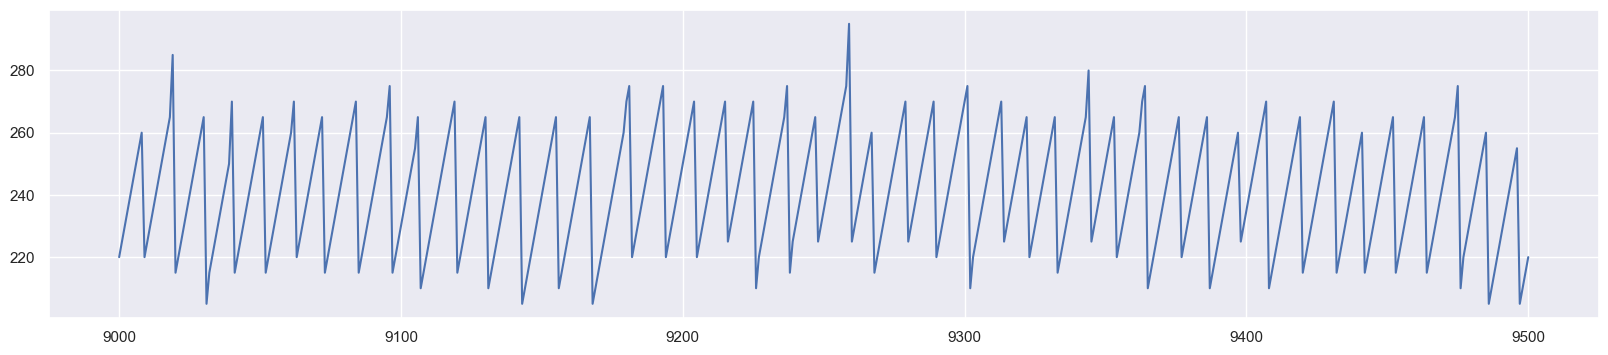

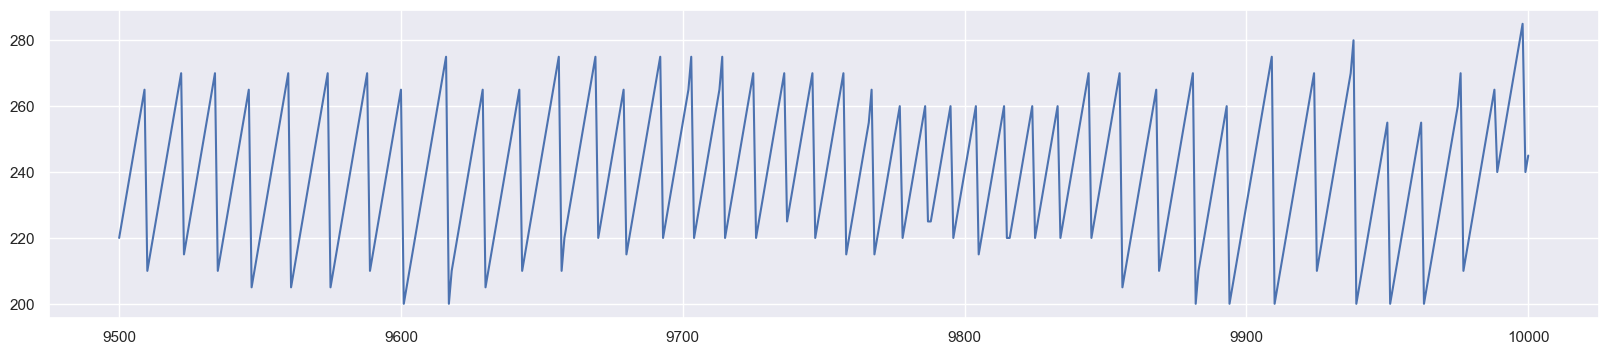

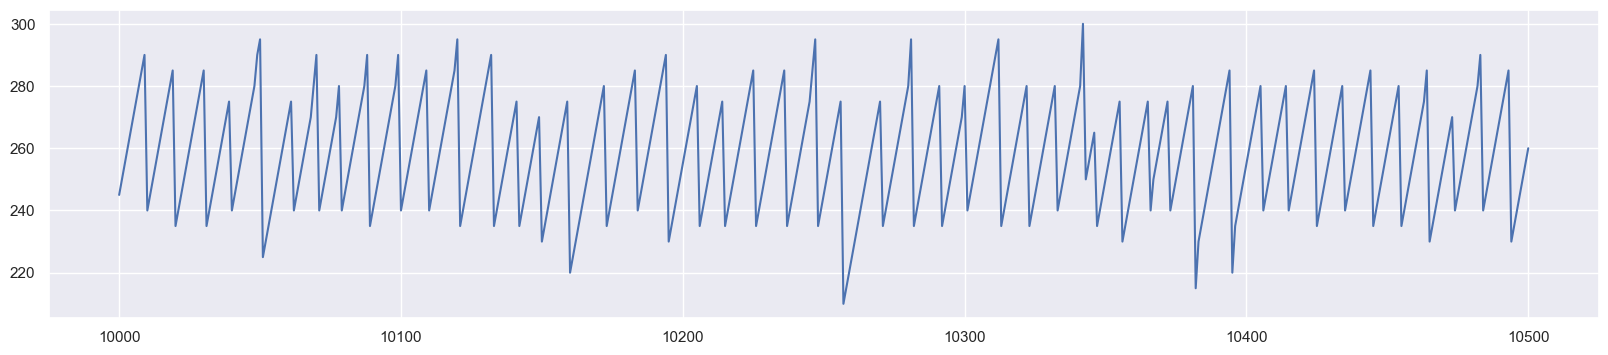

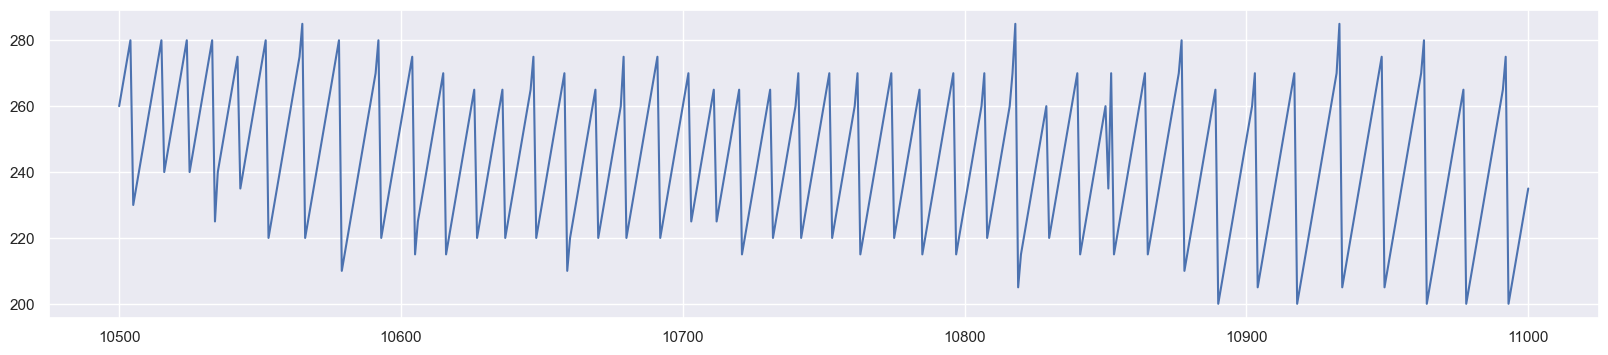

In [11]:
# check if all bins are in order
jumps = 500
i_max = df_LF.shape[0] // jumps

for i in range(i_max):
    if i == i_max:
        df_LF.loc[i*jumps:, 'lgth'].plot(figsize=(20, 4))
        plt.show()
    else:
        df_LF.loc[i*jumps:(i+1)*jumps, 'lgth'].plot(figsize=(20, 4))
        plt.show()

# Sites

In [12]:
LF_sites = set(df_LF.SITE1.unique()) | set(df_LF.SITE2.unique()) | set(df_LF.SITE3.unique())
SD_sites = set(df_SD.SITE1.unique()) | set(df_SD.SITE2.unique())
len(LF_sites), len(SD_sites)

(47, 62)

In [13]:
# Length Frequency sites that don't appear in logbook
LF_sites - SD_sites

{'10', '36', '42', 'EricMcFarlane', 'JimmyMacFarlane', 'JohnAlbertCoady'}

In [14]:
df_LF

,yy,mm,dd,Time,river,week,site,loc,period,wt_lbs,wt_kg,lgth,freq,Flbin,DATETIME,SITE1,SITE2,SITE3
0,1990,5,7,NaN,NaN,2,12,LOWER,PM,NaN,NaN,250,1,250,1990-05-07,12,<NA>,<NA>
1,1990,5,7,NaN,NaN,2,12,LOWER,PM,NaN,NaN,253,1,250,1990-05-07,12,<NA>,<NA>
2,1990,5,7,NaN,NaN,2,12,LOWER,PM,NaN,NaN,255,2,255,1990-05-07,12,<NA>,<NA>
3,1990,5,7,NaN,NaN,2,12,LOWER,PM,NaN,NaN,258,2,255,1990-05-07,12,<NA>,<NA>
4,1990,5,7,NaN,NaN,2,12,LOWER,PM,NaN,NaN,260,7,260,1990-05-07,12,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,2019,6,28,NaN,MARGAREE,9,12,UPPER,PM,68.700,31.162,240,20,240,2019-06-28,12,<NA>,<NA>
11436,2019,6,28,NaN,MARGAREE,9,12,UPPER,PM,68.700,31.162,245,10,245,2019-06-28,12,<NA>,<NA>
11437,2019,6,28,NaN,MARGAREE,9,12,UPPER,PM,68.700,31.162,250,8,250,2019-06-28,12,<NA>,<NA>
11438,2019,6,28,NaN,MARGAREE,9,12,UPPER,PM,68.700,31.162,255,1,255,2019-06-28,12,<NA>,<NA>


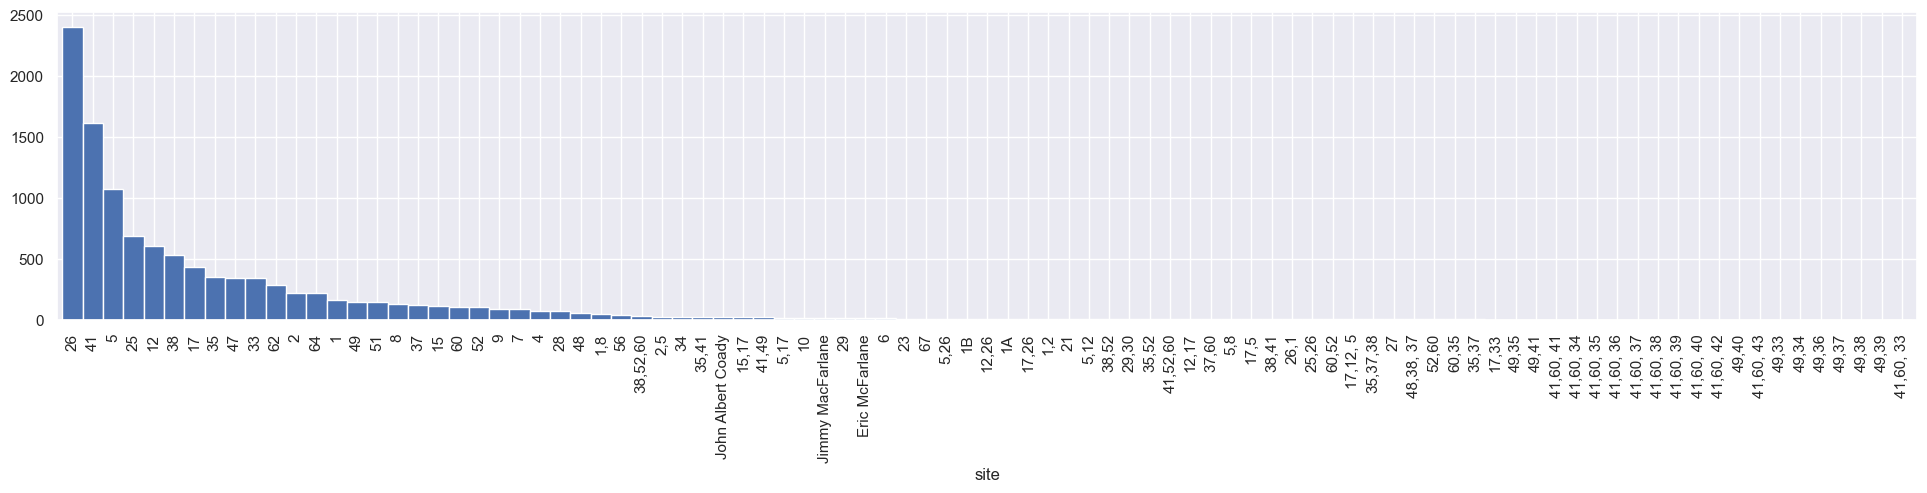

In [15]:
# let's check some stuff first
df_LF.groupby('site').count()['freq'].sort_values(ascending=False).plot(kind='bar', figsize=(24, 4), width=1)
plt.show()

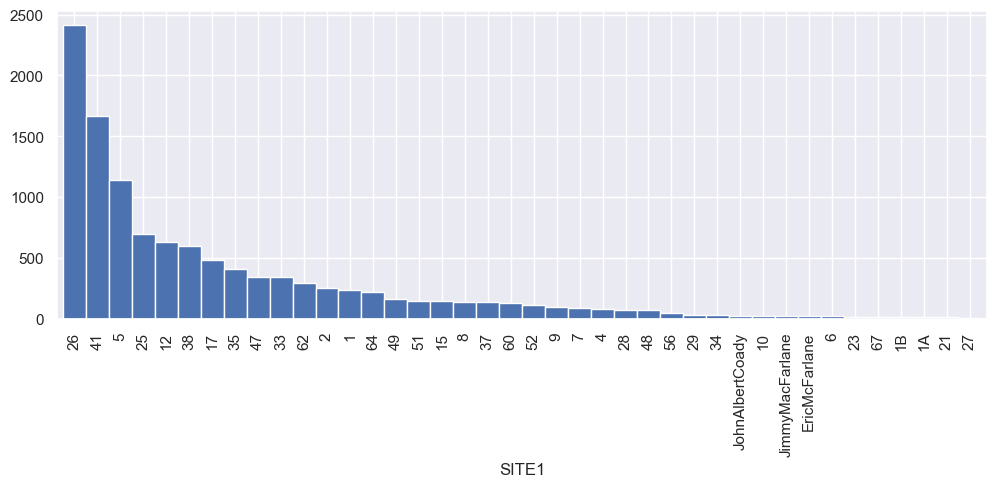

In [16]:
df_LF.groupby('SITE1').count()['freq'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), width=1)
plt.show()

In [17]:
# in SITE2 or SITE3, but never in SITE1
pd.DataFrame(list(LF_sites))[~pd.DataFrame(list(LF_sites)).isin(list(df_LF.groupby('SITE1').count()['freq'].index))].dropna()

,0
15,36
22,30
23,40
32,39
33,43
45,42


In [18]:
# there are only 3 duplicates, so we're unlikely to have ambiguity
df_SD.groupby(['DATETIME', 'SITE1']).count()['SITE_NO'].sort_values(ascending=False).head()

DATETIME    SITE1
1988-05-23  48       2
1997-06-12  58       2
2004-06-10  1        2
2006-06-15  12       1
2006-06-13  41       1
Name: SITE_NO, dtype: int64

In [19]:
# not sure how there are more duplicates here than in SD, doesn't seem to make sense
# NOTE: df_LF.lgth.diff() < 0 is True when a new length distribution starts (see the zig zags above)
df_LF[df_LF.lgth.diff() < 0].groupby(['DATETIME', 'SITE1']).count()['site'].sort_values(ascending=False).head(20)

DATETIME             SITE1
2000-06-09 00:00:00  26       2
1998-05-01 00:00:00  5        2
1993-06-04 00:00:00  26       2
1993-06-01 00:00:00  8        2
2018-06-13 00:00:00  64       2
2003-05-23 00:00:00  26       2
2000-06-07 00:00:00  26       2
1993-06-03 00:00:00  52       2
1993-06-09 00:00:00  33       2
2000-06-15 00:00:00  38       2
2001-05-16 00:00:00  5        2
2011-05-06 10:10:00  26       1
2011-05-11 10:15:00  41       1
2011-05-07 10:00:00  26       1
2011-05-10 11:45:00  26       1
2010-06-12 08:45:00  26       1
2010-06-11 09:00:00  41       1
2010-06-10 14:00:00  26       1
1990-05-08 00:00:00  5        1
2011-05-14 17:45:00  41       1
Name: site, dtype: int64